In [1]:
import numpy as np

In [2]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.

    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha

        if alpha < 1e-3:
            break
    return alpha


def gradient_descent(f, grad_f, x_0, k_max, tol_f, tol_x, backtracking_func=None, alpha=.05):
    x_k = x_0

    k = 0
    f_vals = []
    grads = []
    errs = []
    x_ks = []

    norm = np.linalg.norm

    while k < k_max:
        k = k + 1

        x_prev = x_k

        if backtracking_func:
            alpha = backtracking_func(f, grad_f, x_k)

        x_k = x_k - alpha * grad_f(x_k)

        f_vals.append(f(x_k))
        grads.append(grad_f(x_k))
        errs.append(norm(grad_f(x_k)))
        x_ks.append(x_k)

        if norm(grad_f(x_k)) < tol_f * norm(grad_f(x_0)):
            break
        if norm(x_k - x_prev) < tol_x:
            break

    return x_k, k, f_vals, grads, errs, x_ks

In [3]:
from matplotlib import pyplot as plt


def plot_function_2D(f, range_x=(-5, 5), points=1000, ax=None):
    x = np.linspace(*range_x, points)
    y = f(x)

    if not ax:
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.plot(x, y, 'r')

    else:
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")
        ax.plot(x, y, 'r')


def plot_gradient_descent_2D(x_ks, f_vals, ax=None, label=""):
    if ax:
        ax.scatter(x_ks, f_vals, label=label)
    else:
        plt.scatter(x_ks, f_vals, label=label)


def plot_function_3D(f, range_x=(-5, 5), range_y=(-5, 5), points_per_axis=100, ax=None):
    x_points = np.linspace(*range_x, points_per_axis)
    y_points = np.linspace(*range_y, points_per_axis)

    X, Y = np.meshgrid(x_points, y_points)
    Z = f((X, Y))

    if not ax:
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(projection='3d')

    ax.plot_surface(X, Y, Z, alpha=0.7)


def plot_gradient_descent_3D(x_ks, f_vals, ax=None):
    x_ks = np.array(x_ks)

    if not ax:
        plt.plot(x_ks[:, 0], x_ks[:, 1], f_vals, "--ro")
    else:
        ax.plot(x_ks[:, 0], x_ks[:, 1], f_vals, "--ro")


def plot_contour_and_gradient_descent(f, x_ks, range_x=(-5, 5), range_y=(-5, 5), points_per_axis=100, optimum=None,
                                      ax=None):
    x_points = np.linspace(*range_x, points_per_axis)
    y_points = np.linspace(*range_y, points_per_axis)

    X, Y = np.meshgrid(x_points, y_points)
    Z = f((X, Y))

    if not ax:
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot()

    ax.contour(X, Y, Z)

    x_ks = np.array(x_ks)
    ax.plot(x_ks[:, 0], x_ks[:, 1], "--ro")

    if optimum:
        ax.plot(optimum[0], optimum[1], marker="x", markeredgecolor="green", markersize=20, markeredgewidth=5)


def plot_error(x_ks, x_true, ax=None, label=""):
    if not ax:
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot()

    ax.set_ylabel("Error")
    ax.set_xlabel("Iteration")

    ax.plot([np.linalg.norm(x_k - x_true) for x_k in x_ks], label=label)

In [4]:
def plot_all(f, x_ks, f_vals, range_x, range_y, optimum, plot="no", title=""):
    if plot == "2d":
        fig = plt.figure(figsize=(12, 15))
        fig.suptitle(title)

        graph_ax = fig.add_subplot(2, 1, 1)
        graph_ax.set_title("Function in 2D with gradient descent points")

        error_ax = fig.add_subplot(2, 1, 2)
        error_ax.set_title("Error")

        plot_function_2D(f, range_x, ax=graph_ax)
        plot_gradient_descent_2D(x_ks, f_vals, ax=graph_ax)
        plot_error(x_ks, optimum, ax=error_ax)
    if plot == "3d":
        fig = plt.figure(figsize=(12, 20))
        fig.suptitle(title)

        graph_ax = fig.add_subplot(3, 1, 1, projection='3d')
        graph_ax.set_title("Function in 3D with gradient descent points")

        contour_ax = fig.add_subplot(3, 1, 2)
        contour_ax.set_title("Contour with gradient descent points")

        error_ax = fig.add_subplot(3, 1, 3)
        error_ax.set_title("Error")

        plot_function_3D(f, range_x=range_x, range_y=range_y, ax=graph_ax)
        plot_gradient_descent_3D(x_ks, f_vals, ax=graph_ax)
        plot_contour_and_gradient_descent(f, x_ks, range_x=range_x, range_y=range_y, optimum=optimum, ax=contour_ax)
        plot_error(x_ks, optimum, ax=error_ax)
    if plot == "only-errors":
        fig = plt.figure(figsize=(8, 8))
        fig.suptitle(title)
        error_ax = fig.add_subplot(1, 1, 1)

        plot_error(x_ks, optimum, ax=error_ax)


def plot_error_together(x_ks_n, x_true, labels):
    fig = plt.figure(figsize=(8, 8))
    fig.suptitle("Error given different alpha/backtracking")
    error_ax = fig.add_subplot(1, 1, 1)

    for x_ks, label in zip(x_ks_n, labels):
        plot_error(x_ks, x_true, ax=error_ax, label=label)

    error_ax.legend()


def plot_gradient_together(grads_n, labels):
    fig = plt.figure(figsize=(8, 8))
    fig.suptitle("Gradient convergence given different alpha/backtracking")
    error_ax = fig.add_subplot(1, 1, 1)

    error_ax.set_ylabel("Gradient")
    error_ax.set_xlabel("Iteration")

    for grads, label in zip(grads_n, labels):
        error_ax.plot([np.linalg.norm(grad) for grad in grads], label=label)

    error_ax.legend()


#plot = 2d, 3d, summary, only-errors, no
def test(f, grad_f, x_0, optimum, plot="no", range_x=(-5, 5), range_y=(5, 5)):
    x_ks_n = []
    grads_n = []
    labels = []

    x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=x_0, k_max=1000, tol_f=1e-6, tol_x=1e-6,
                                                         backtracking_func=backtracking)
    plot_all(f, x_ks, f_vals, range_x, range_y, optimum, plot, title=f"Backtracking")

    x_ks_n.append(x_ks)
    grads_n.append(grads)
    labels.append("Backtracking")

    alpha = 0.005
    x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=x_0, k_max=1000, tol_f=1e-6, tol_x=1e-6,
                                                         alpha=alpha)
    plot_all(f, x_ks, f_vals, range_x, range_y, optimum, plot, title=f"No backtracking, {alpha=}")

    x_ks_n.append(x_ks)
    grads_n.append(grads)
    labels.append(f"{alpha=}")

    alpha = 0.05
    x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=x_0, k_max=1000, tol_f=1e-6, tol_x=1e-6,
                                                         alpha=alpha)
    plot_all(f, x_ks, f_vals, range_x, range_y, optimum, plot, title=f"No backtracking, {alpha=}")

    x_ks_n.append(x_ks)
    grads_n.append(grads)
    labels.append(f"{alpha=}")

    if plot != "no":
        plot_gradient_together(grads_n, labels)
        plot_error_together(x_ks_n, optimum, labels)

    plt.show()



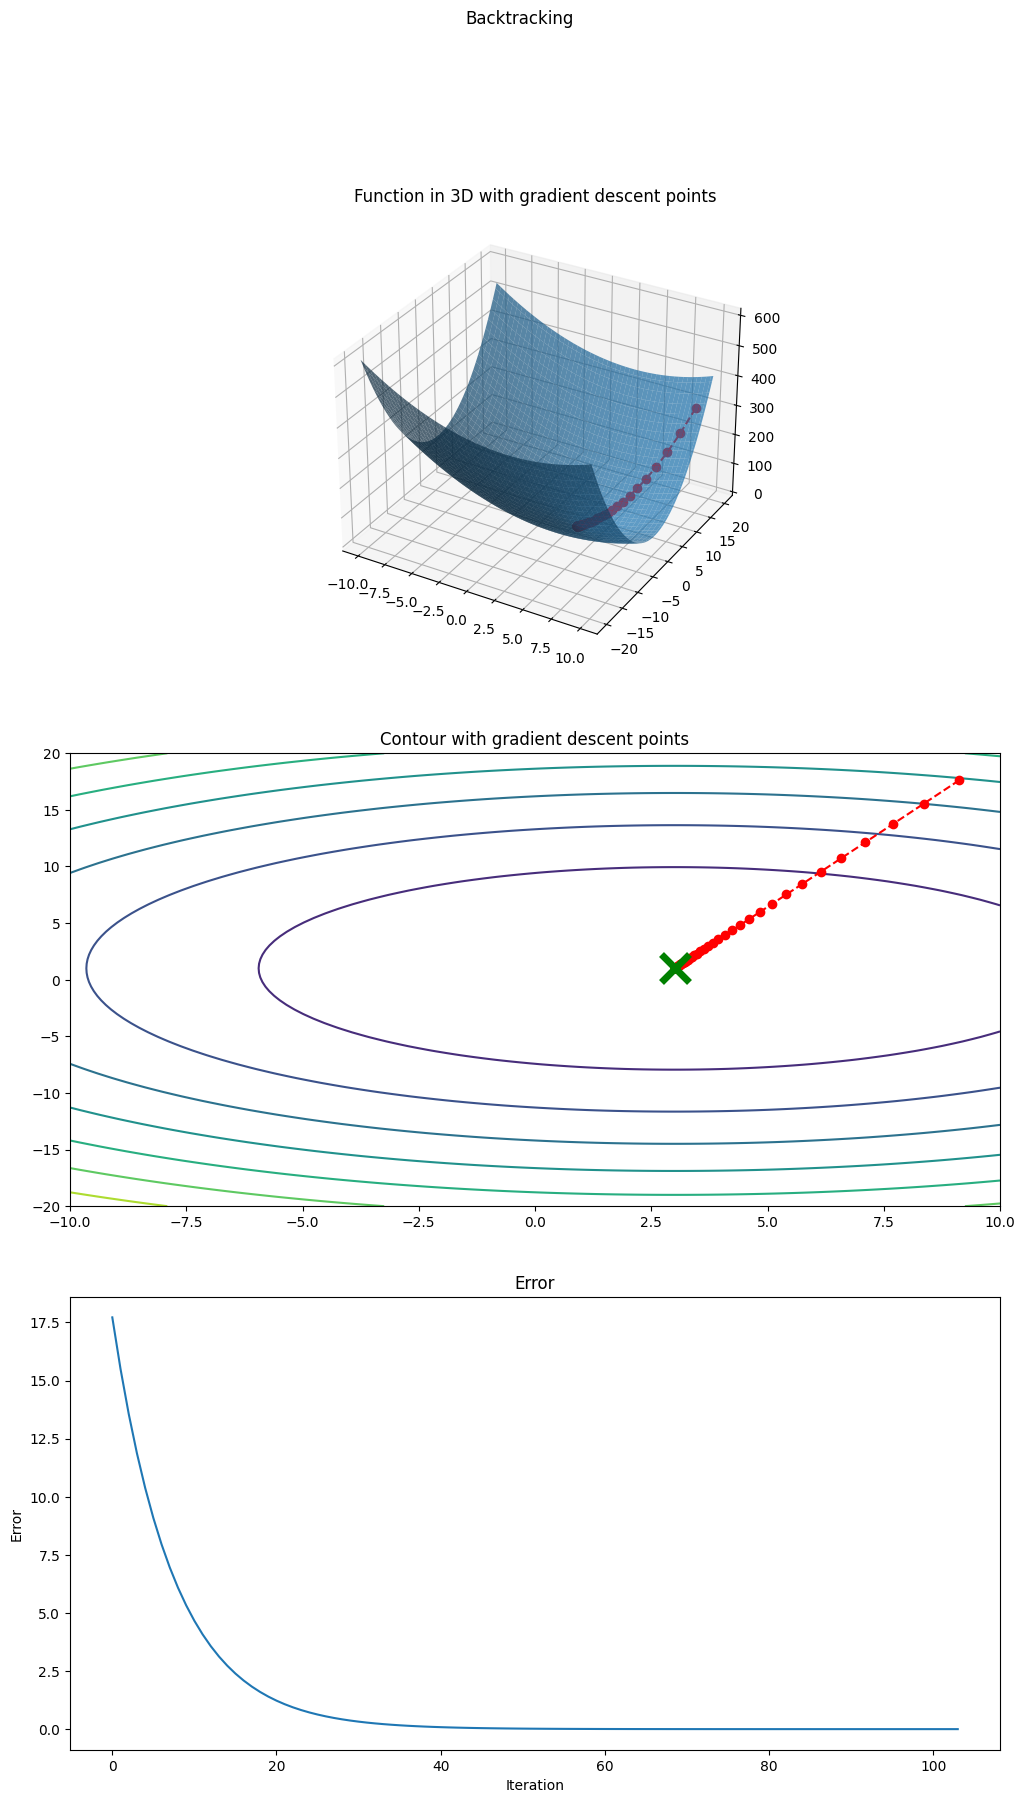

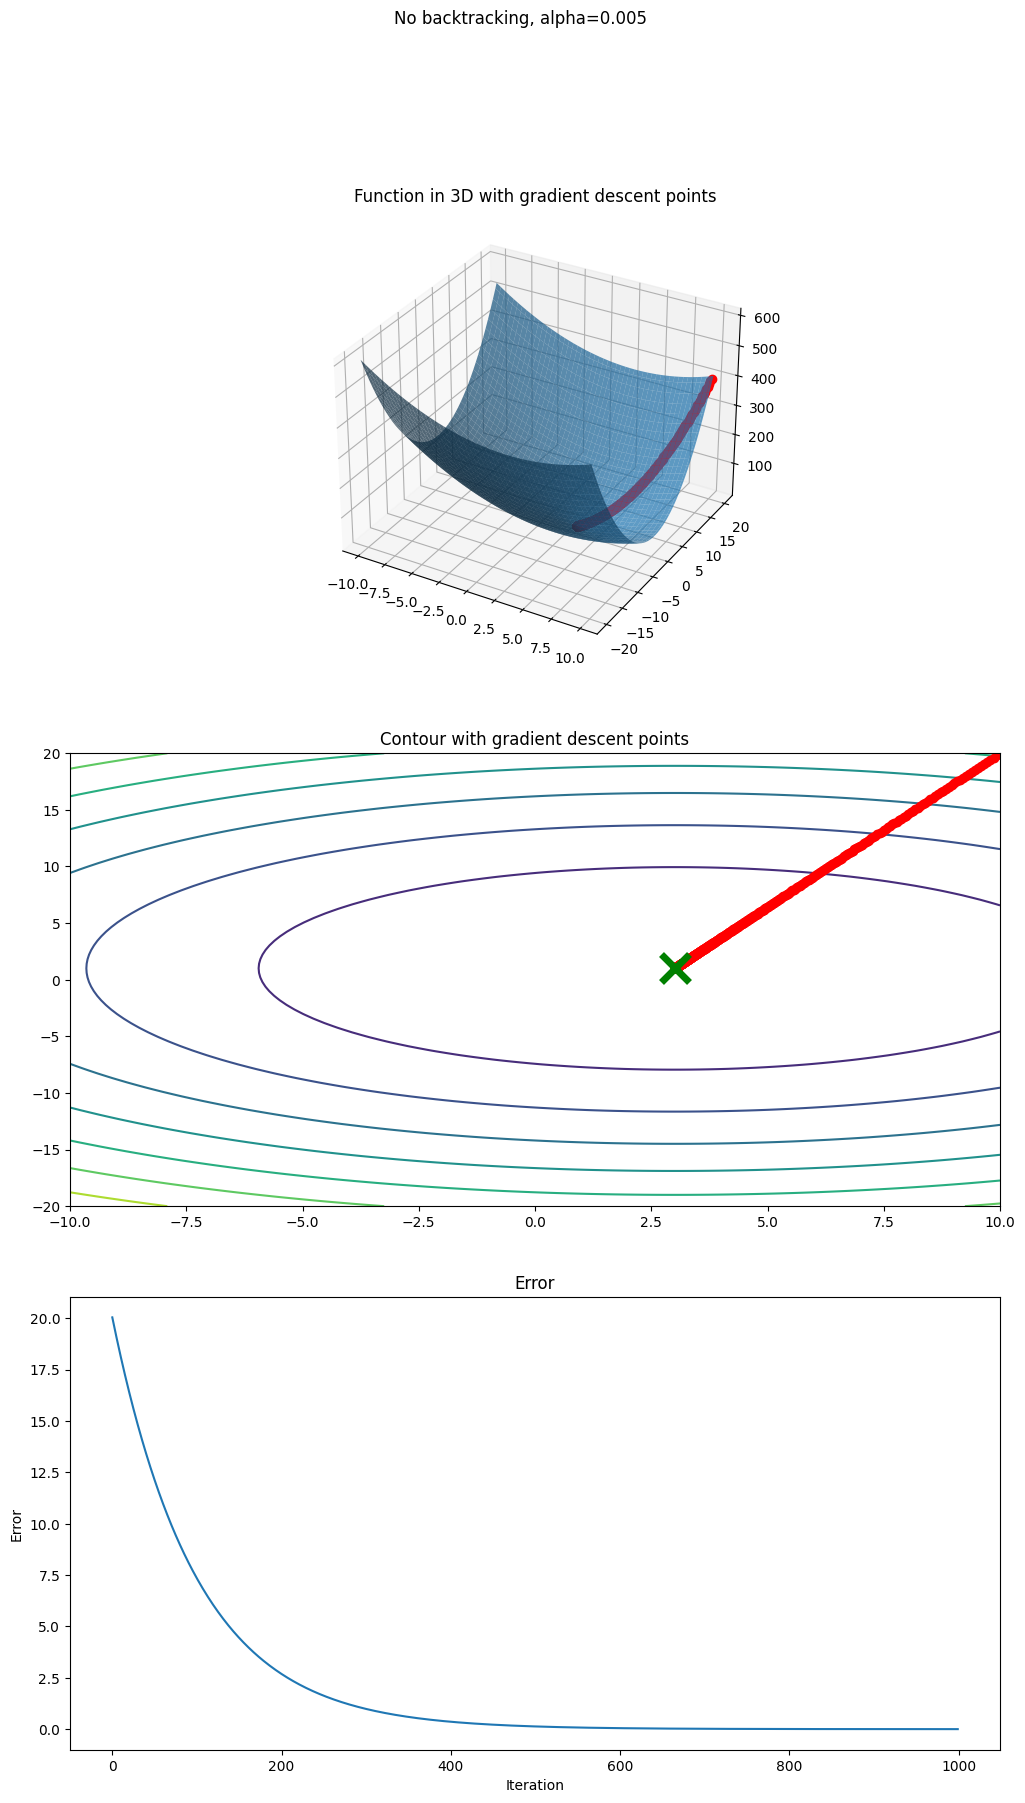

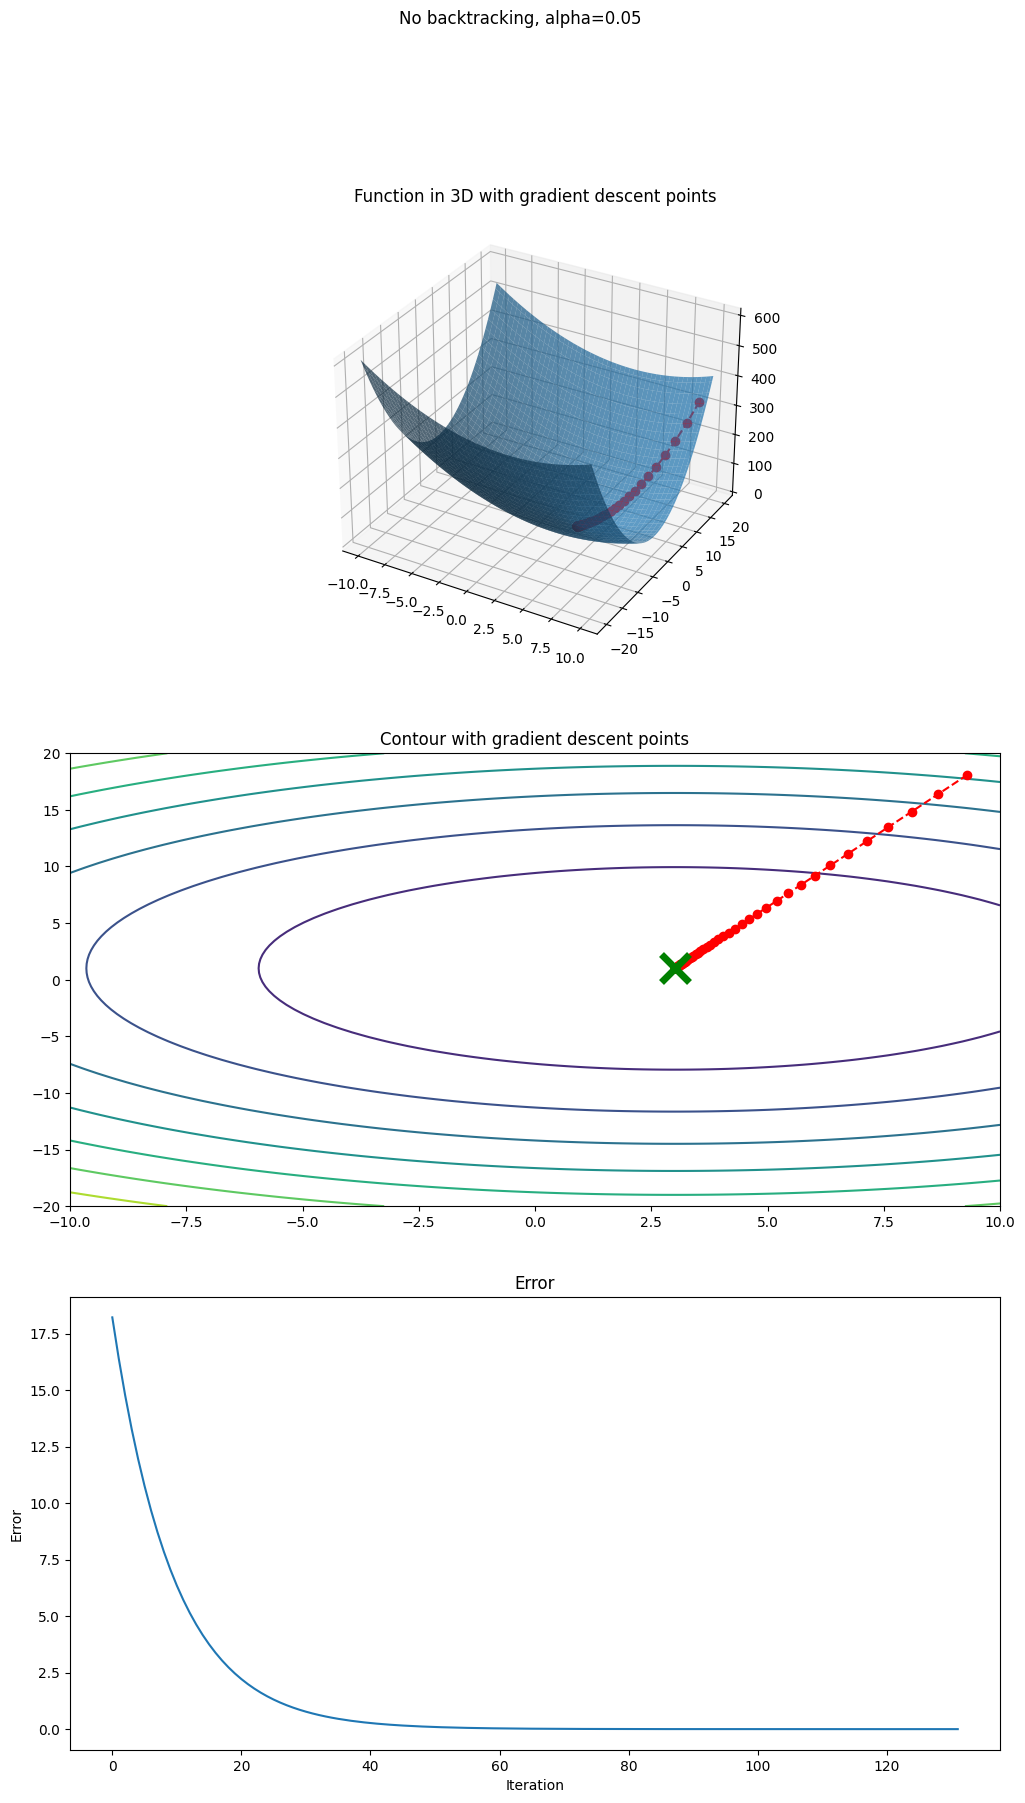

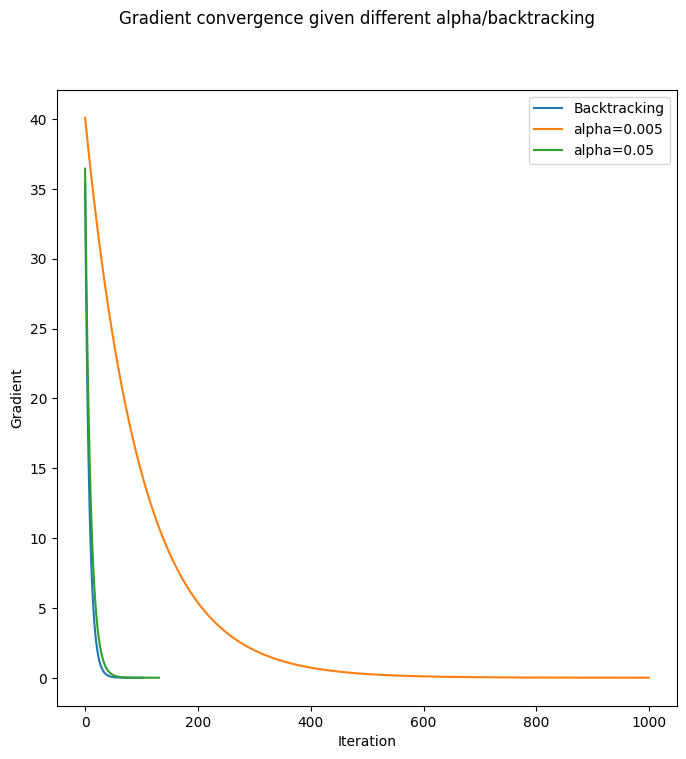

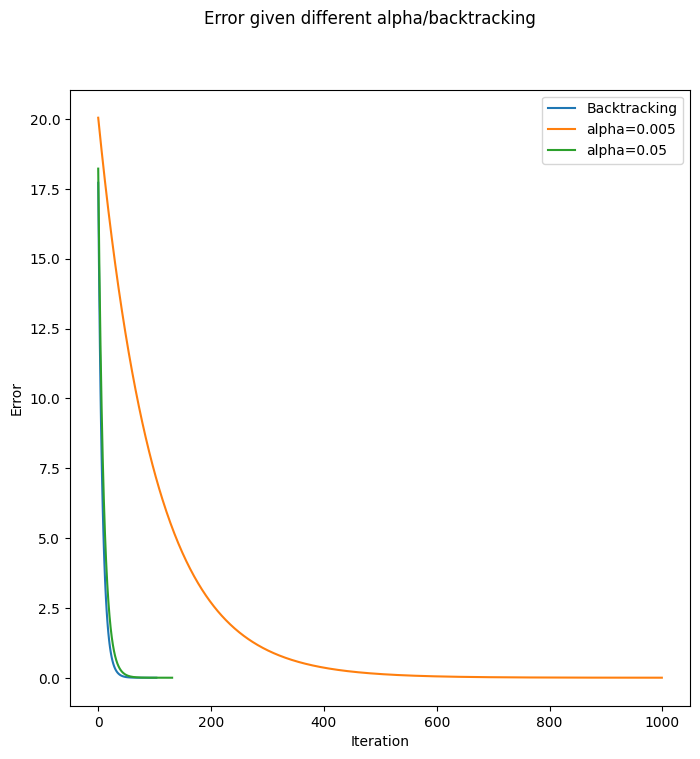

In [5]:
def f(x):
    # x^2 -6x + 9 + y^2 - 2y + 1

    x, y = x
    return (x - 3) ** 2 + (y - 1) ** 2


def grad_f(x):
    x, y = x
    return np.array((2 * x - 6, 2 * y - 2))


test(f, grad_f, x_0=(10, 20), optimum=(3, 1), range_x=(-10, 10), range_y=(-20, 20), plot="3d")


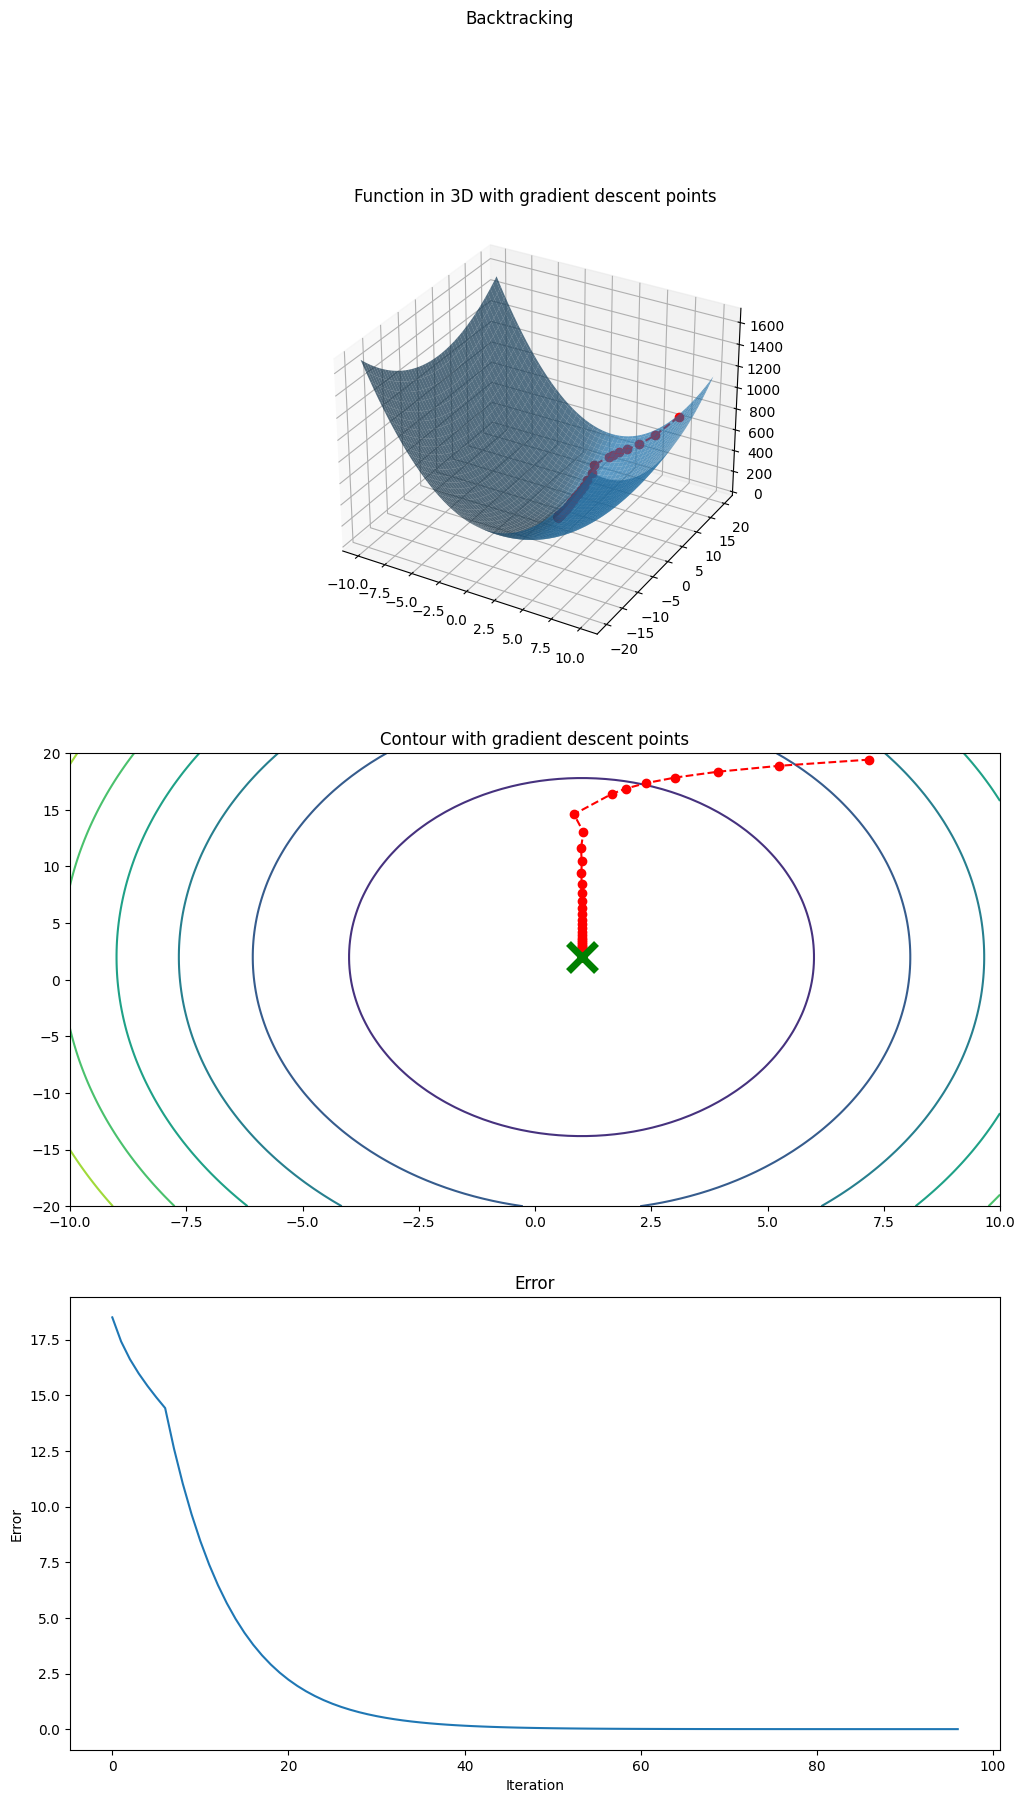

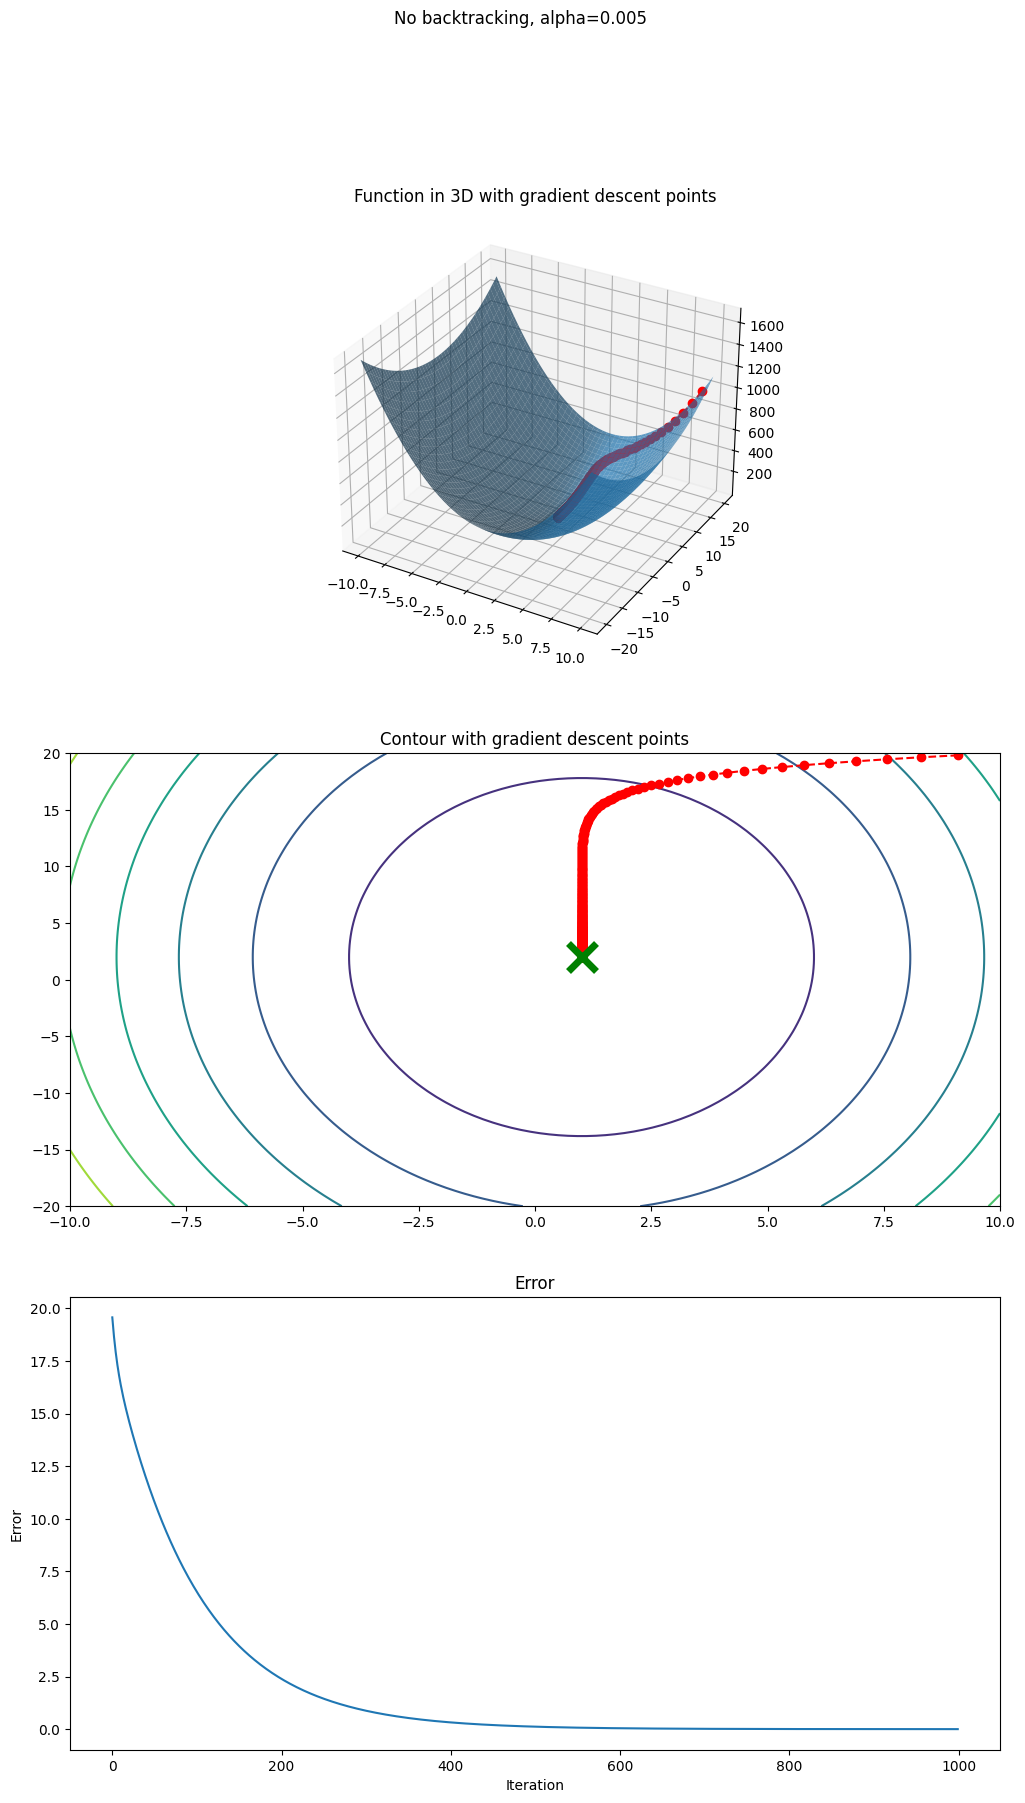

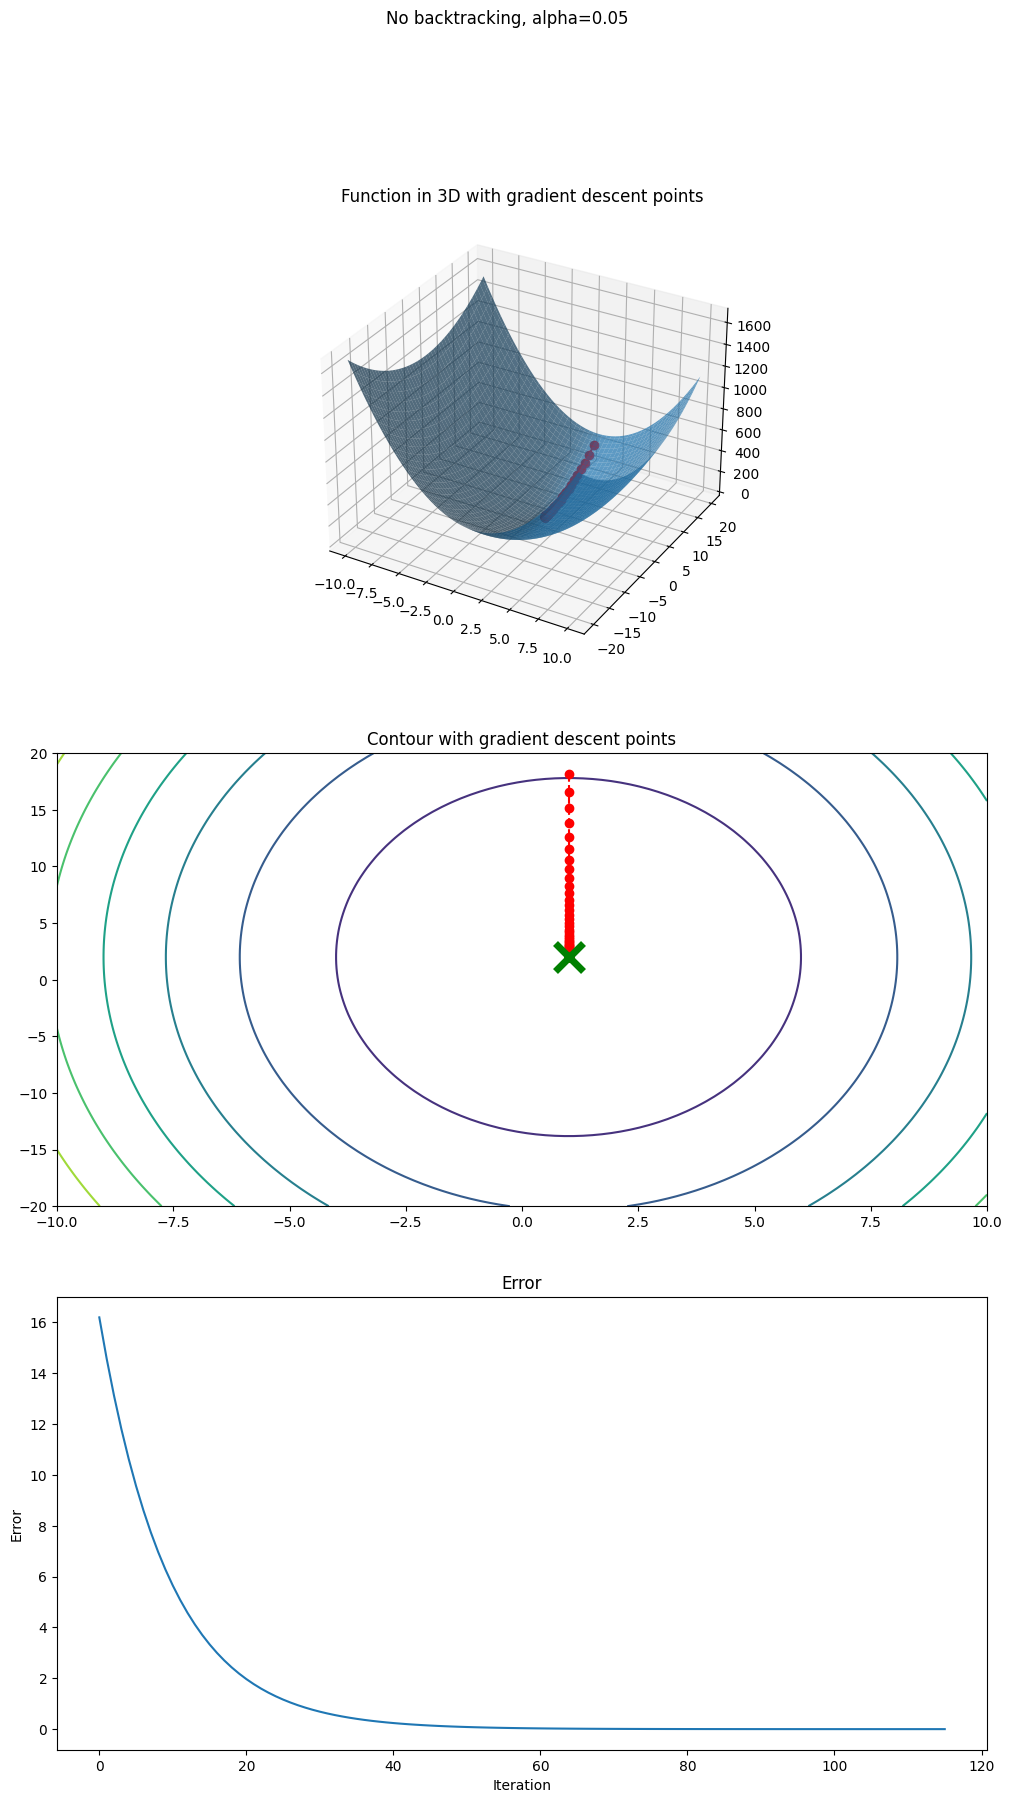

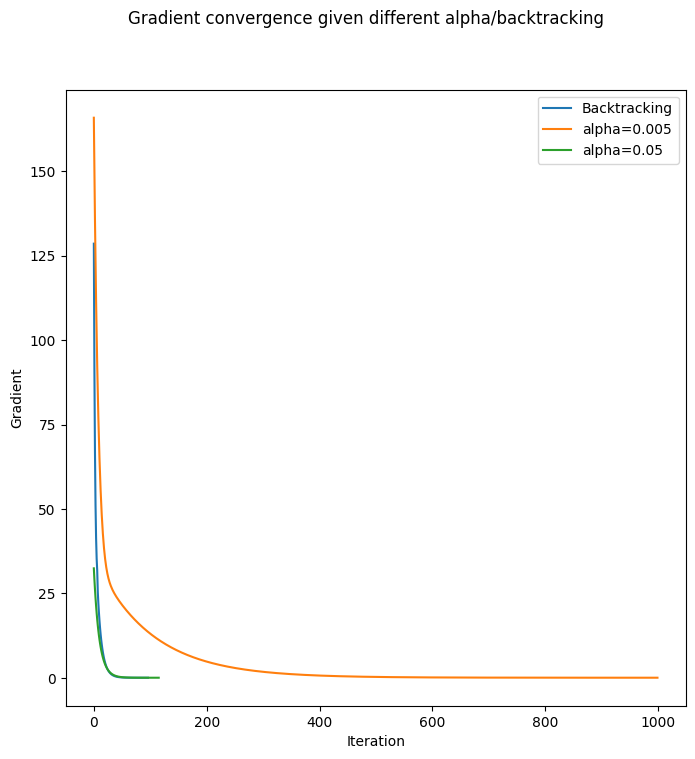

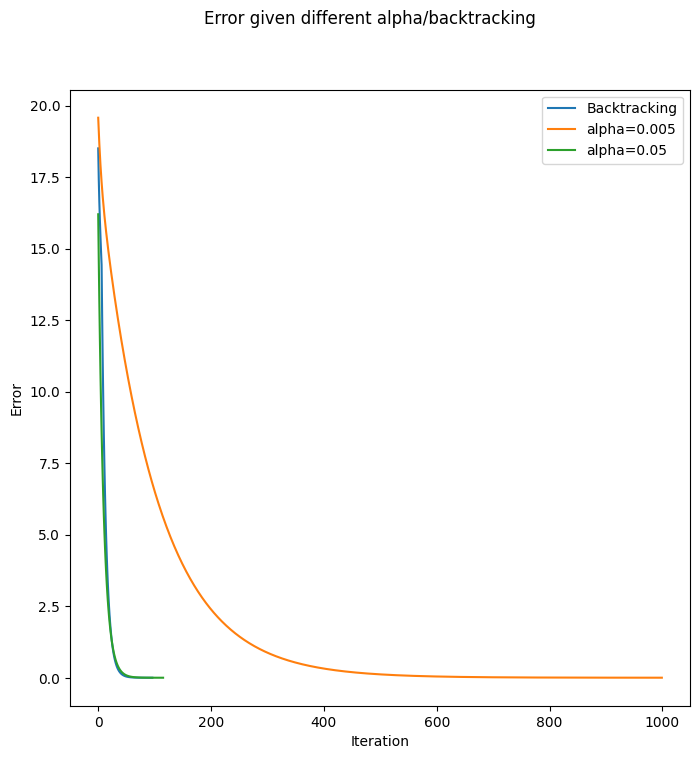

In [6]:
def f(x):
    # 10x^2 -20x +10 + y^2 -4y + 4
    x, y = x
    return 10 * (x - 1) ** 2 + (y - 2) ** 2


def grad_f(x):
    x, y = x
    return np.array((20 * x - 20, 2 * y - 4))


test(f, grad_f, x_0=(10, 20), optimum=(1, 2), range_x=(-10, 10), range_y=(-20, 20), plot="3d")


In [7]:
def vandermonde_n(n):
    v = np.linspace(0, 1, n)
    A = np.vander(v)

    x_true = np.ones(n)
    b = A @ x_true

    def f(x):
        return 0.5 * np.linalg.norm(A @ x - b, 2) ** 2

    def grad_f(x):
        return A.T @ (A @ x - b)

    return f, grad_f


def test_vandermonde_n(n):
    f, grad_f = vandermonde_n(n)
    x_0 = np.zeros(n)
    x_true = np.ones(n)

    test(f, grad_f, x_0=x_0, optimum=x_true, plot="summary")


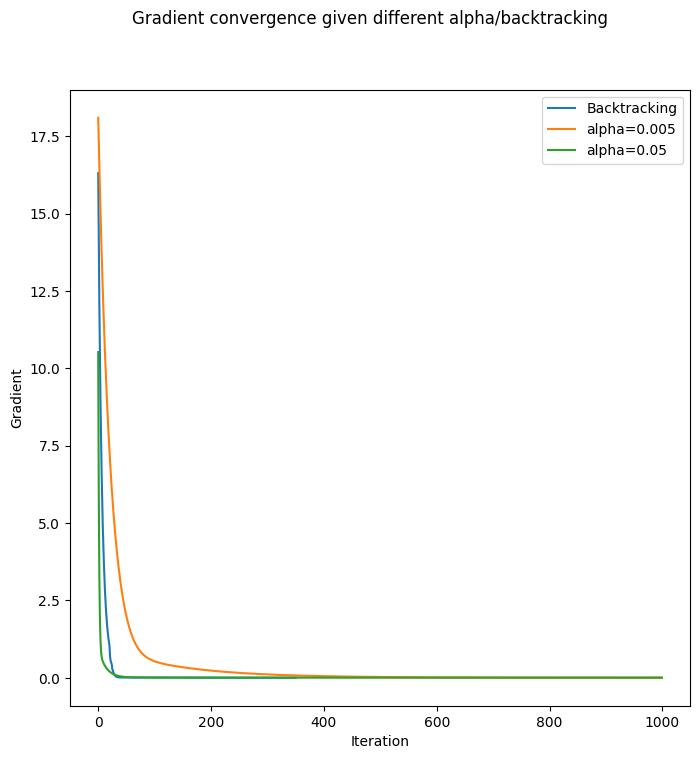

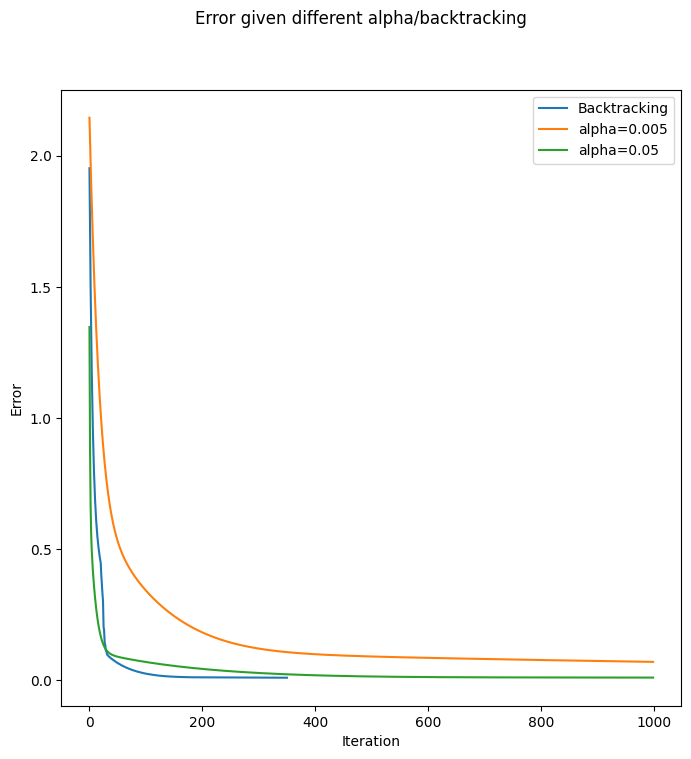

In [8]:
test_vandermonde_n(5)

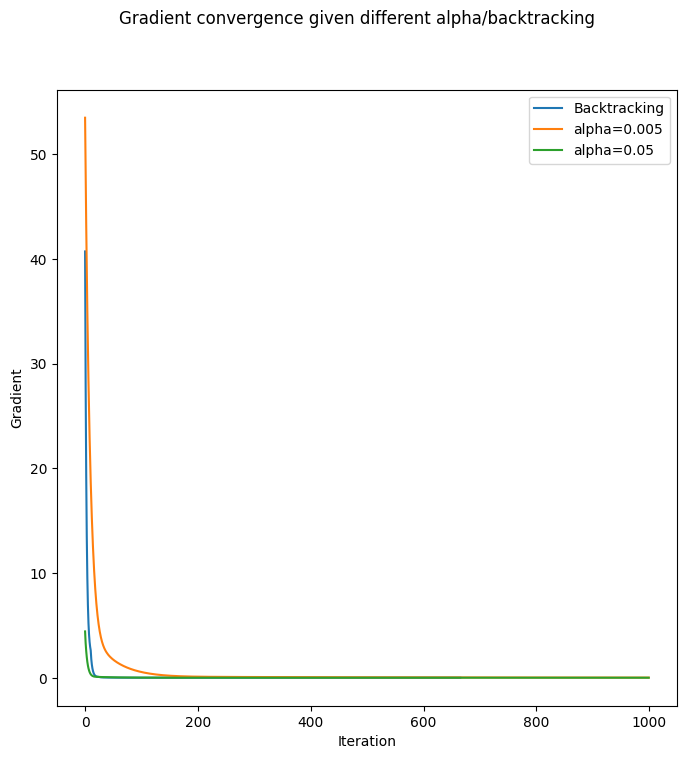

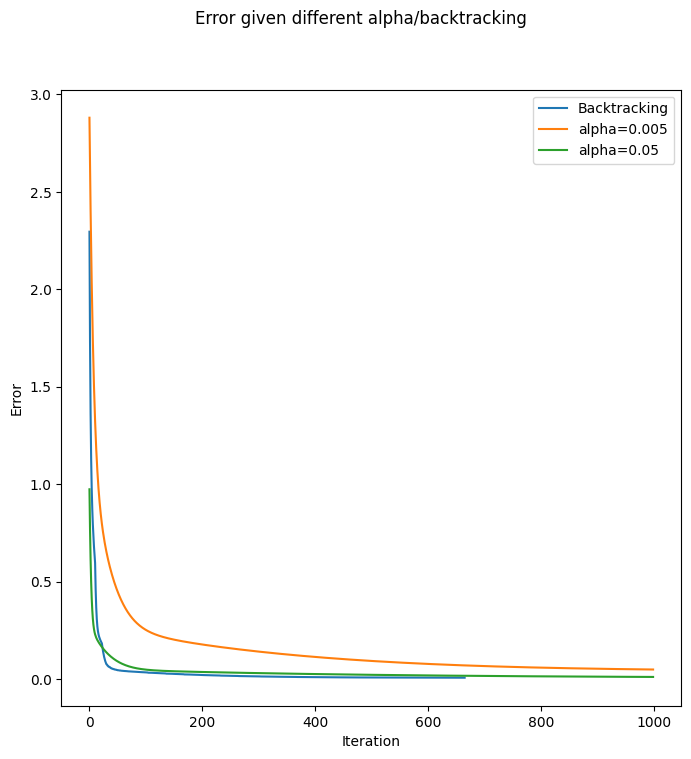

In [9]:
test_vandermonde_n(10)

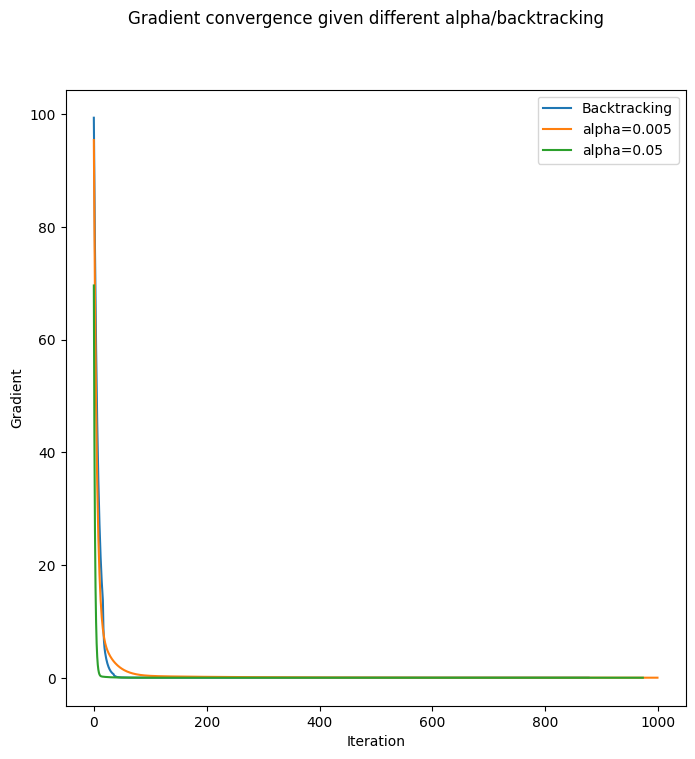

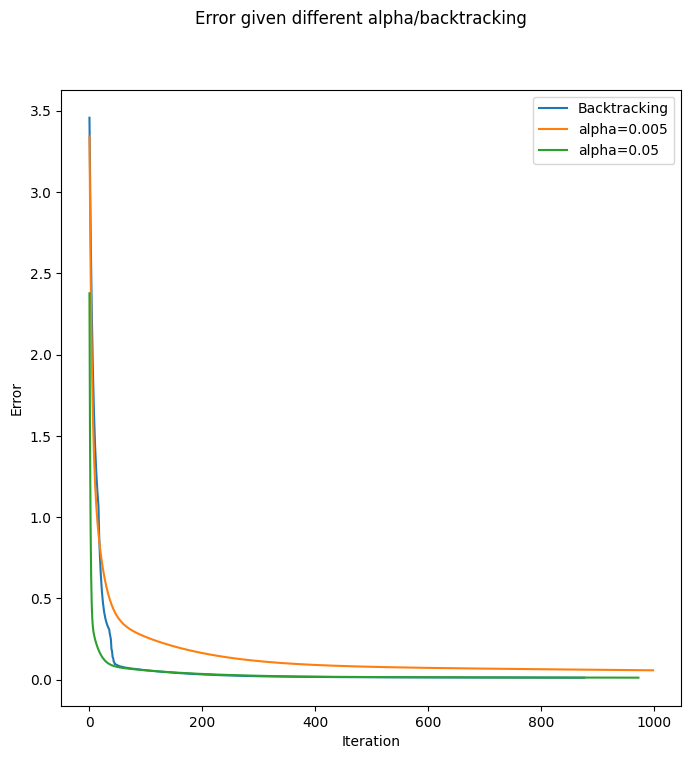

In [10]:
test_vandermonde_n(15)

In [11]:

def expanded_vandermonde_n(n, lambda_=0.5):
    vander_n, grad_vander_n = vandermonde_n(n)

    def f(x):
        return vander_n(x) + (lambda_ / 2) * np.linalg.norm(x) ** 2

    def grad_f(x):
        return grad_vander_n(x) + lambda_ * x

    return f, grad_f


def test_expanded_vandermonde(n, lambda_):
    f, grad_f = expanded_vandermonde_n(n, lambda_)
    x_0 = np.zeros(n)
    x_true = np.ones(n)

    test(f, grad_f, x_0=x_0, optimum=x_true, plot="summary")

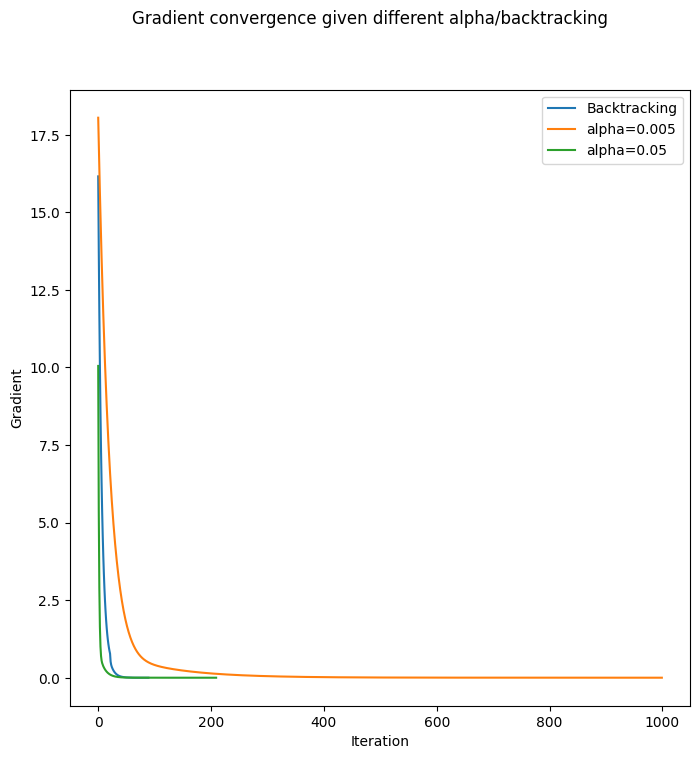

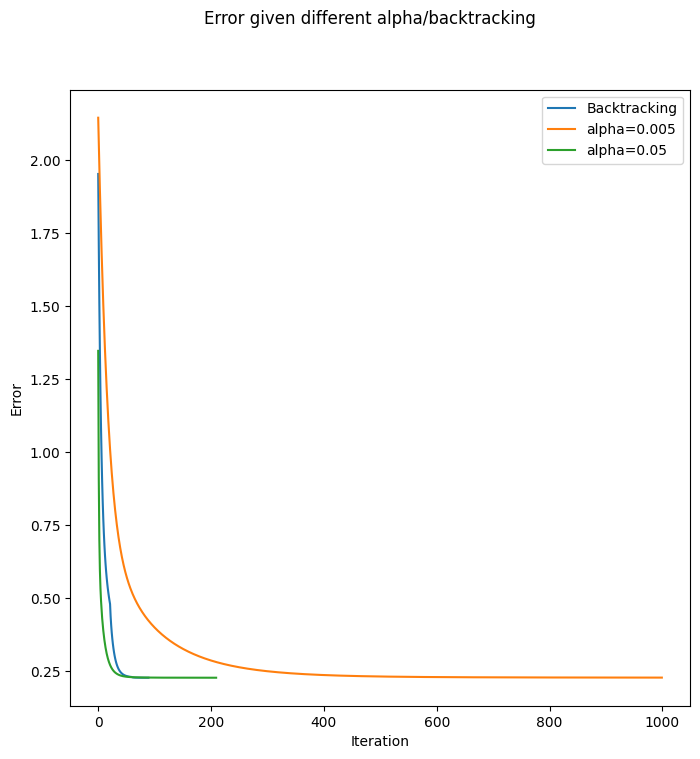

In [12]:
test_expanded_vandermonde(5, 0.5)

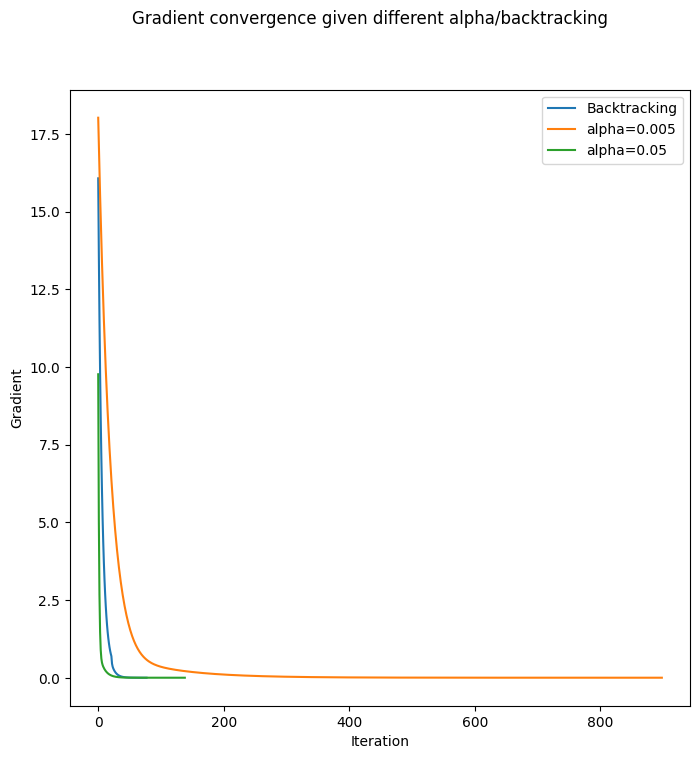

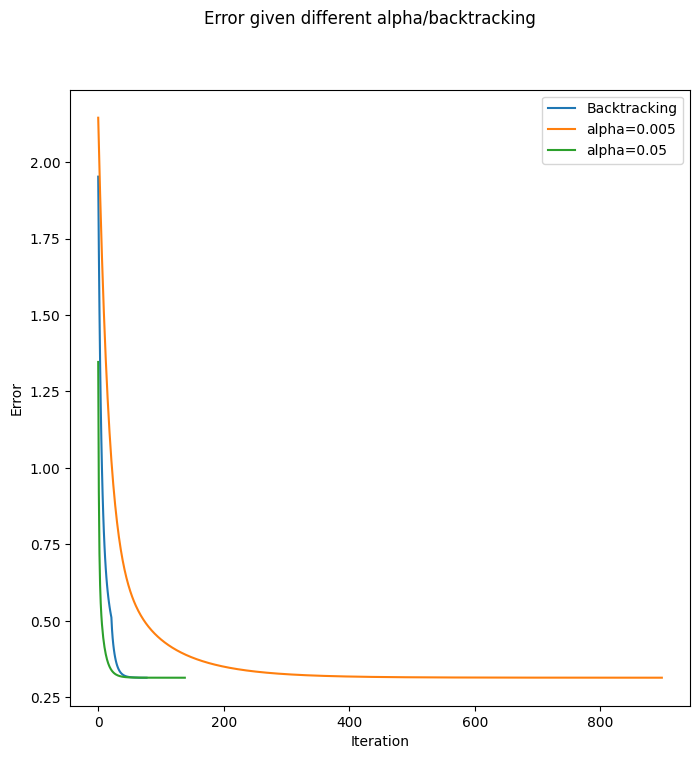

In [13]:
test_expanded_vandermonde(5, 0.8)


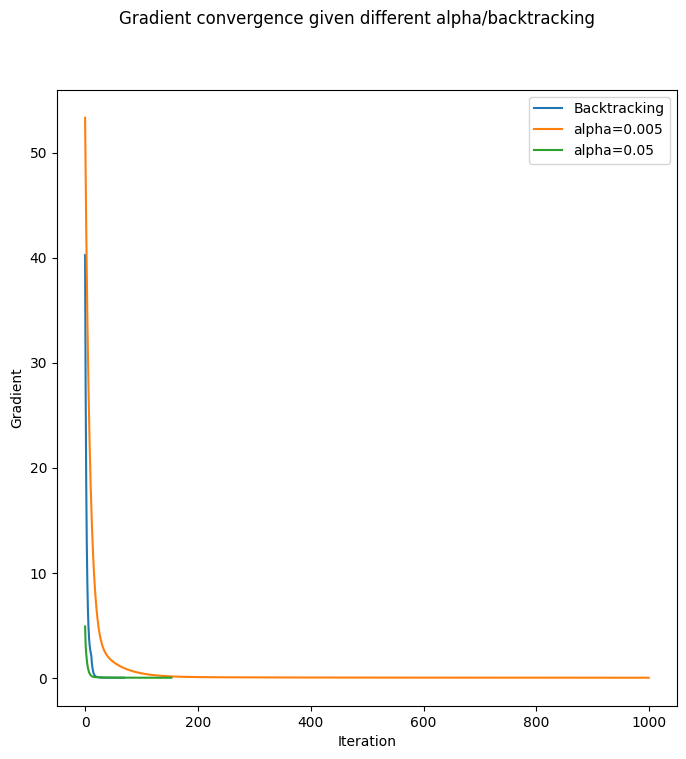

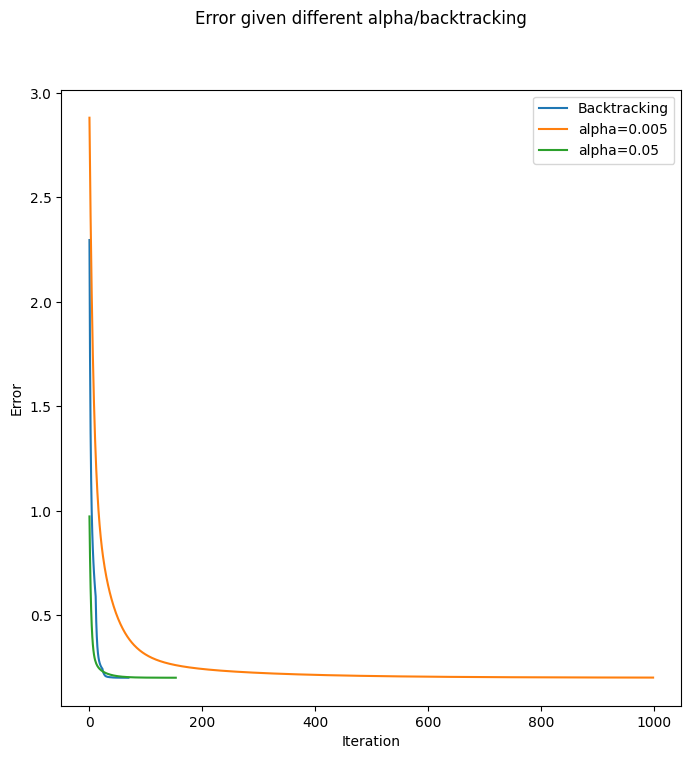

In [14]:
test_expanded_vandermonde(10, 0.5)

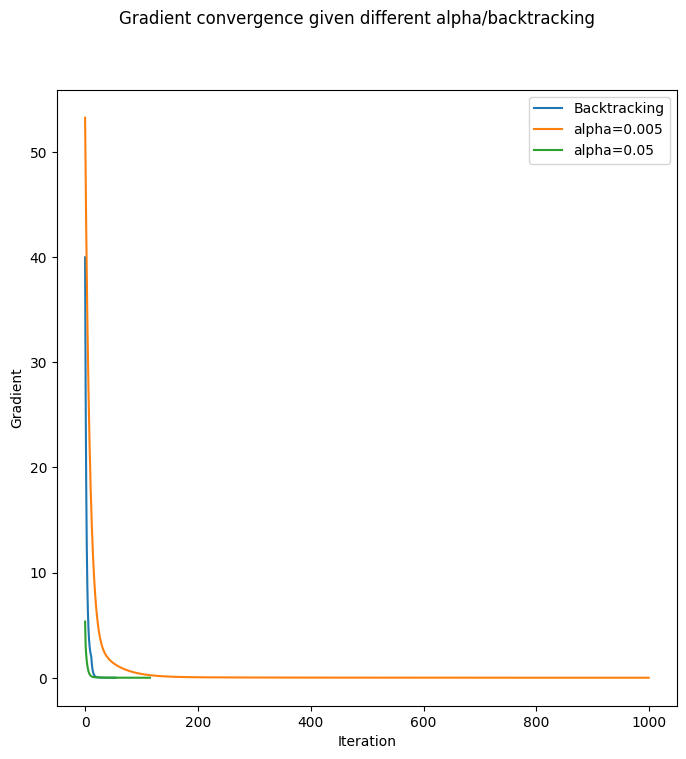

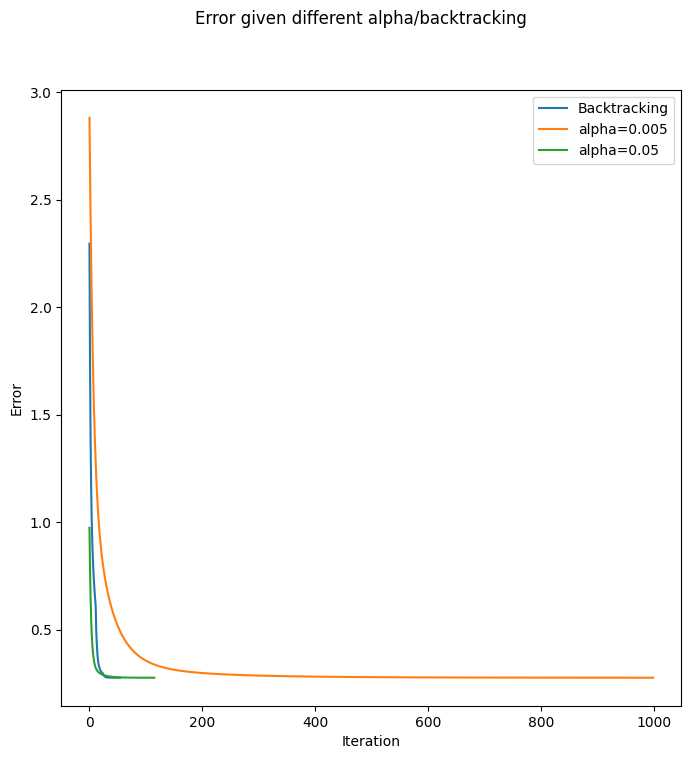

In [15]:
test_expanded_vandermonde(10, 0.8)

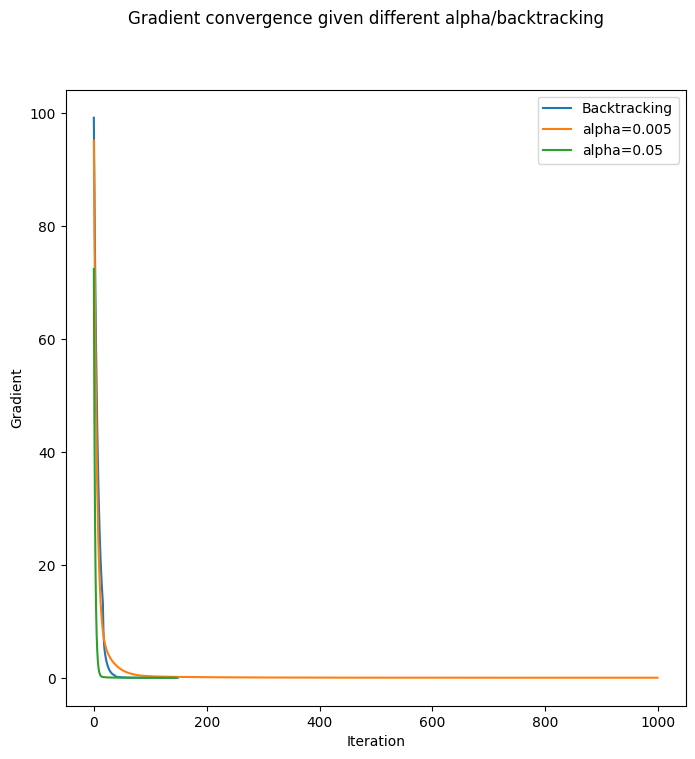

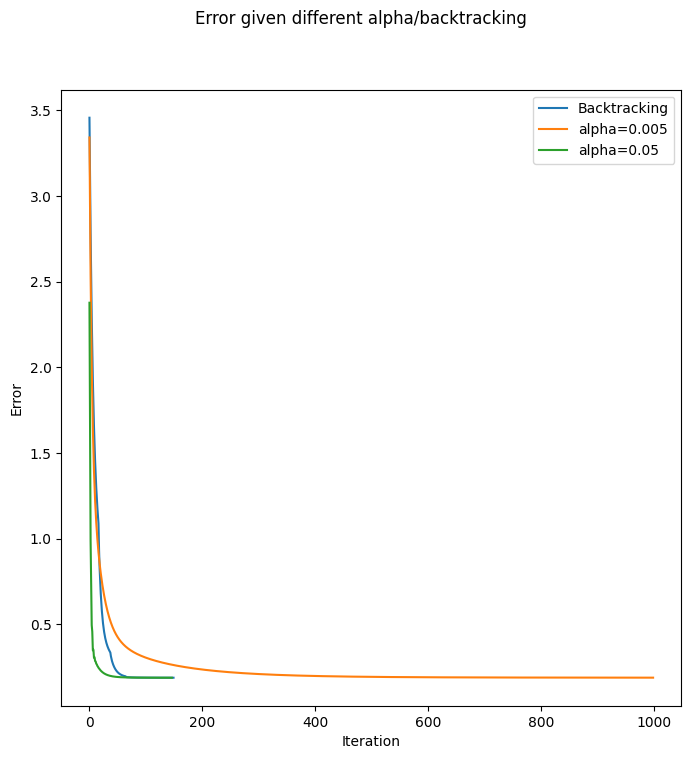

In [16]:
test_expanded_vandermonde(15, 0.5)

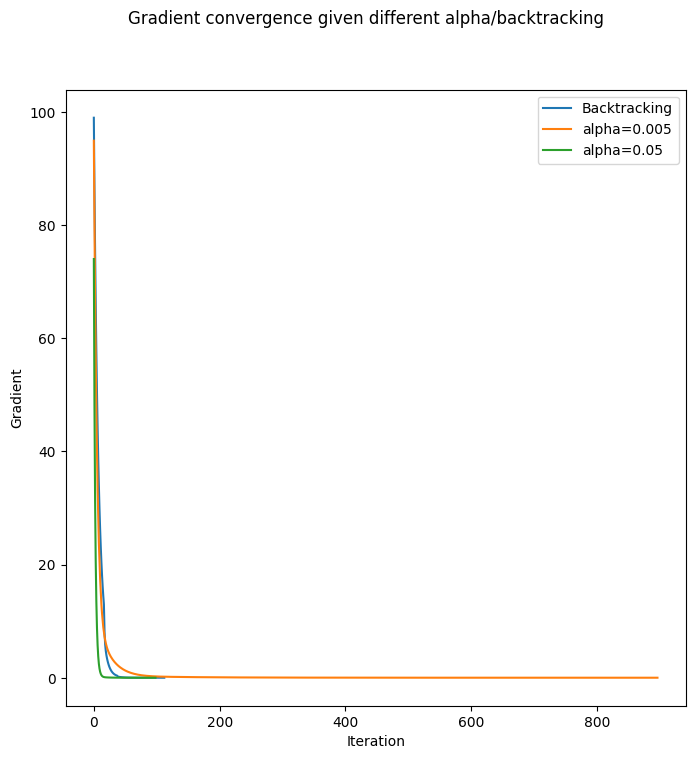

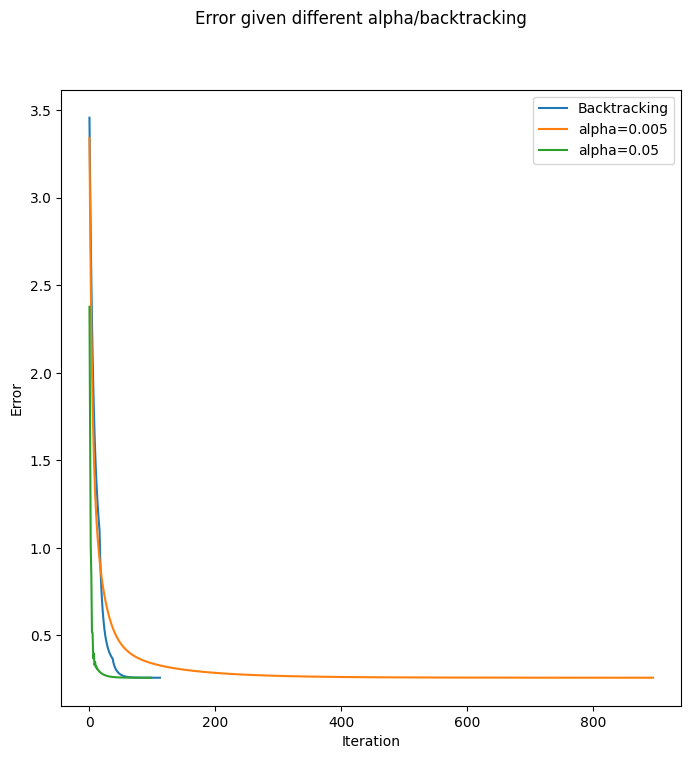

In [17]:
test_expanded_vandermonde(15, 0.8)

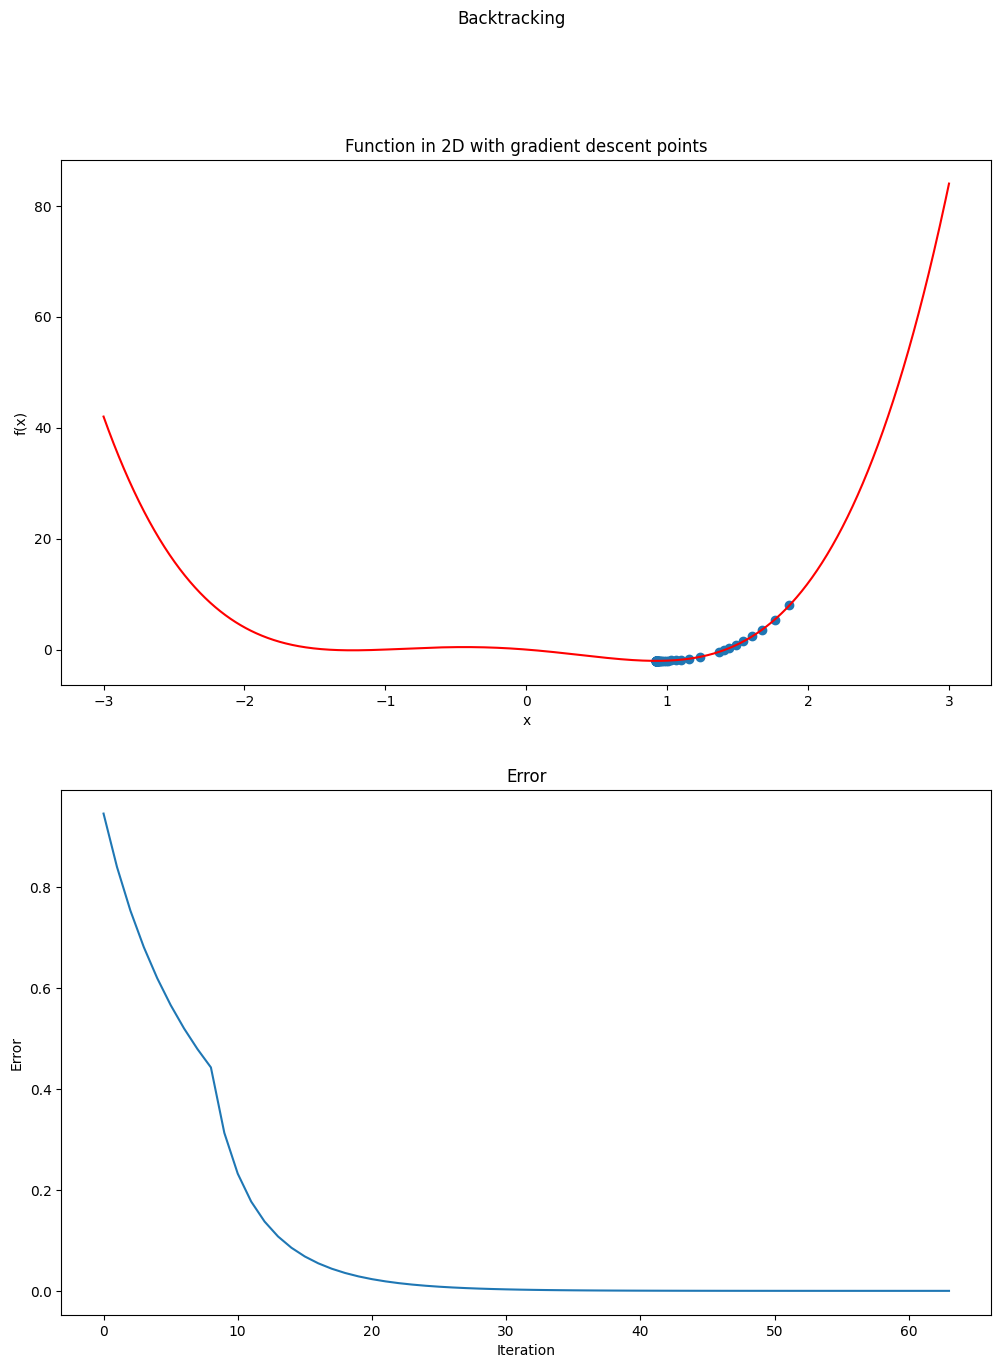

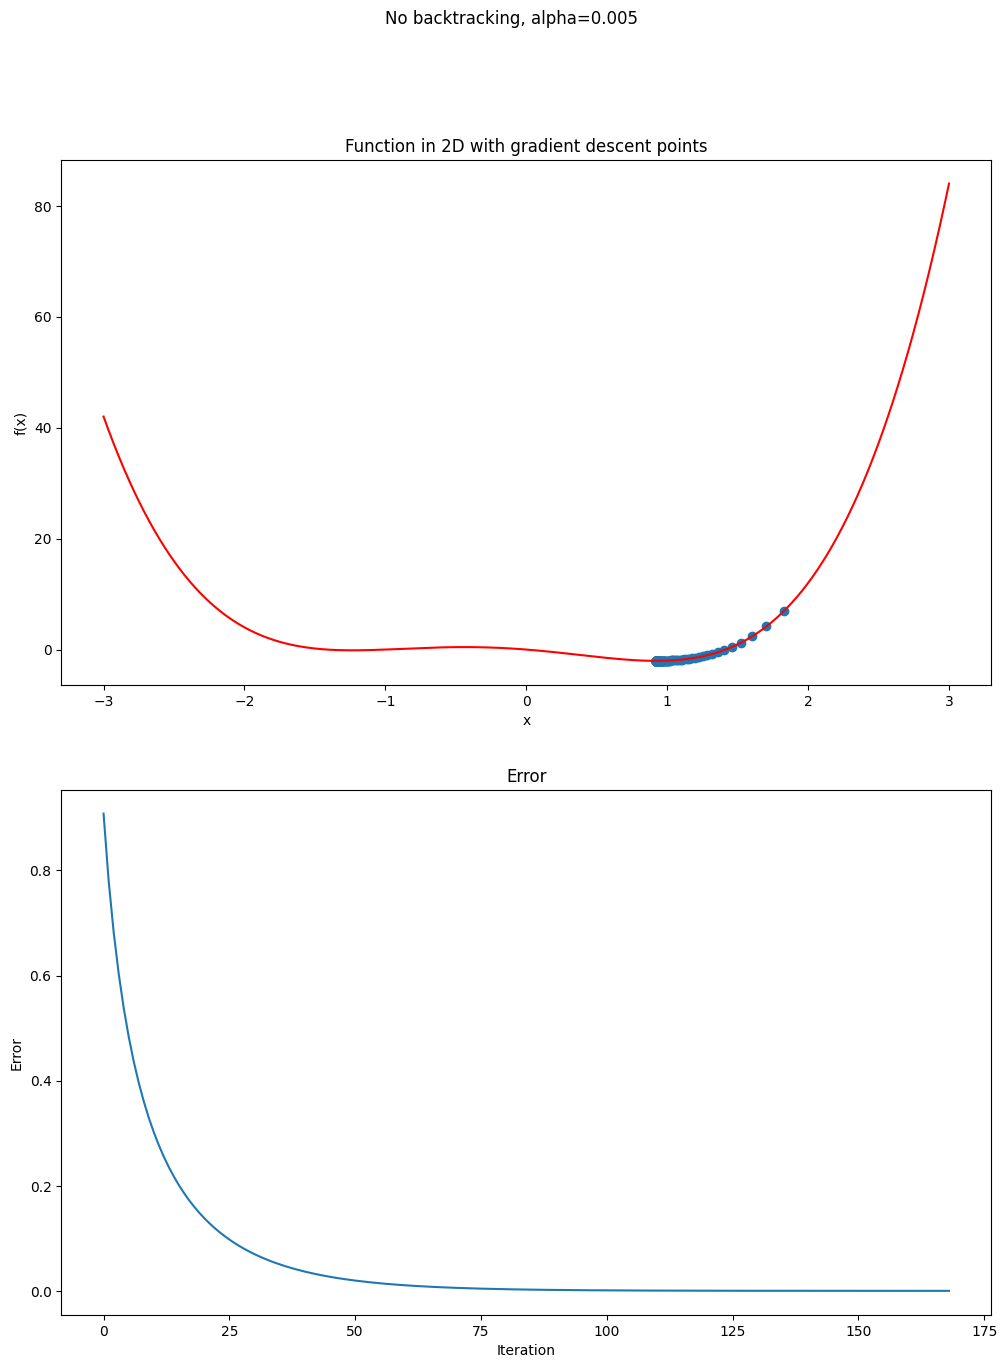

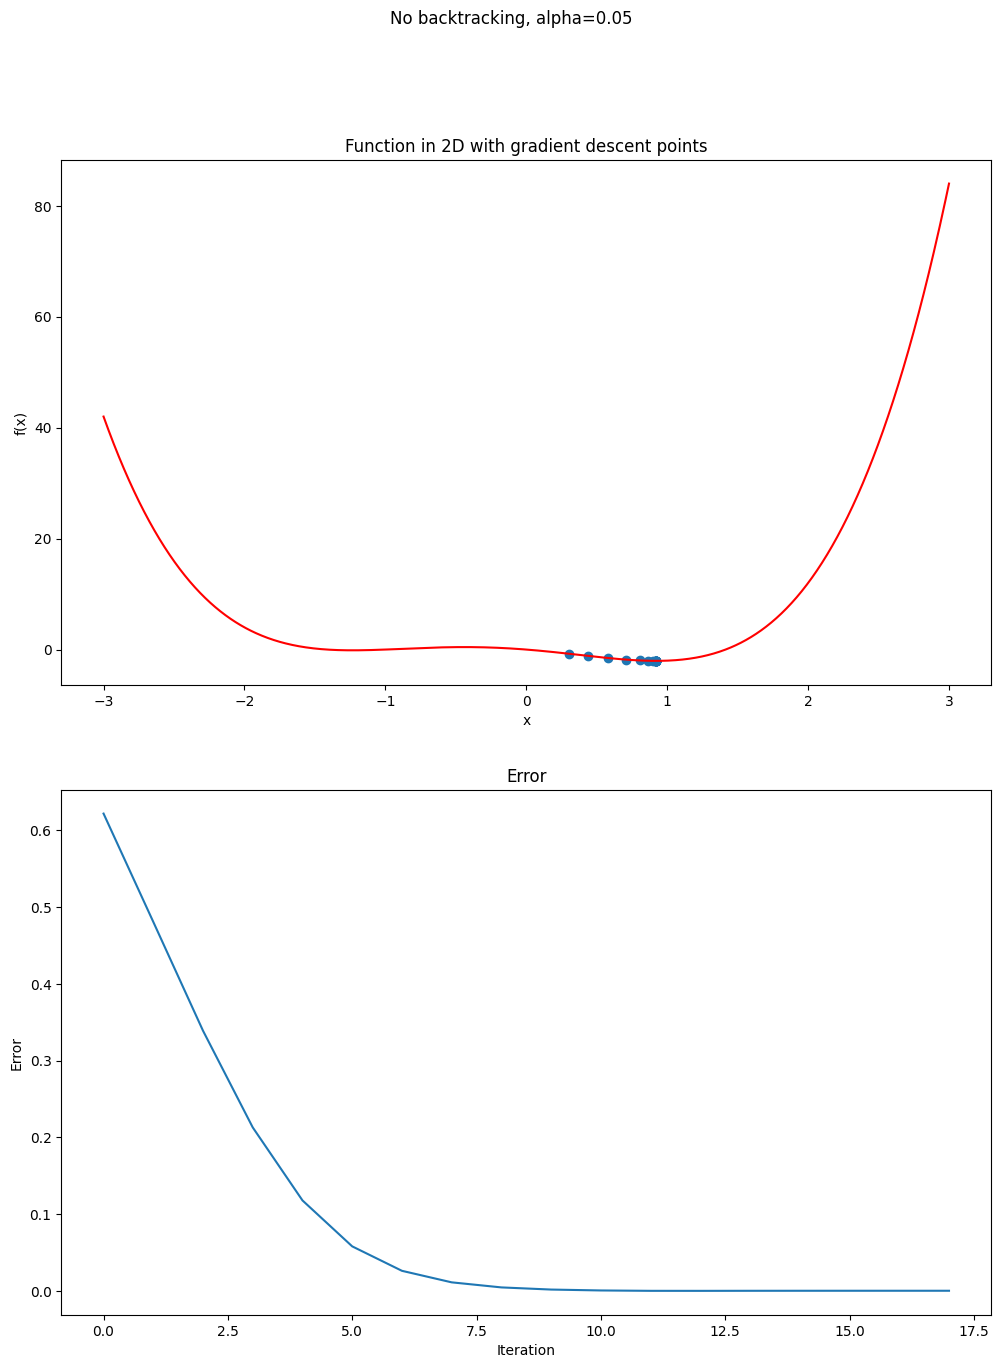

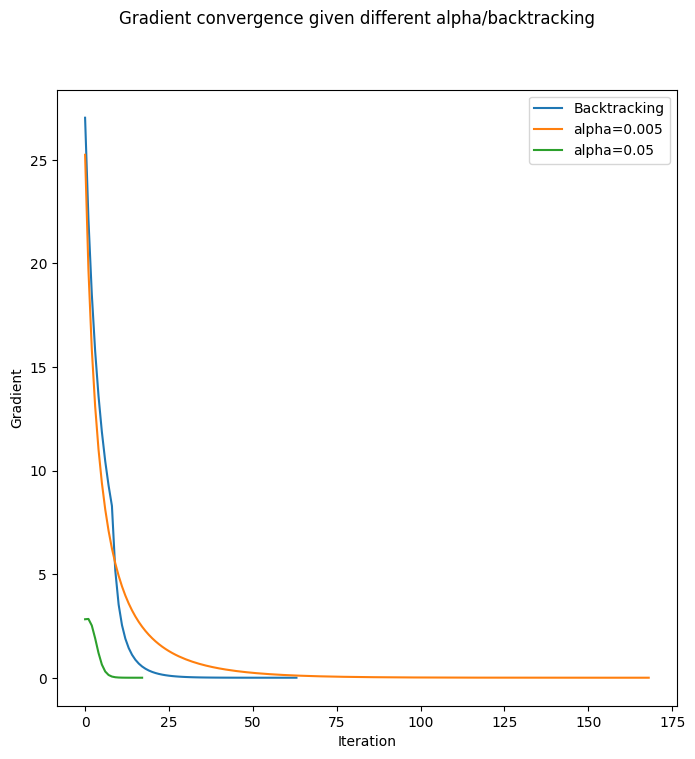

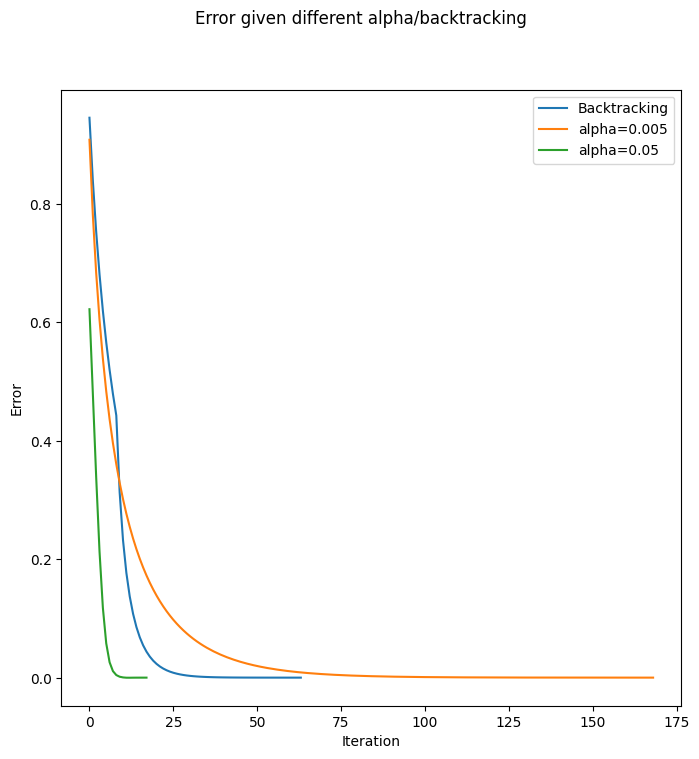

In [18]:
def f(x):
    return x ** 4 + x ** 3 - 2 * x ** 2 - 2 * x


def grad_f(x):
    return 4 * x ** 3 + 3 * x ** 2 - 4 * x - 2


test(f, grad_f, x_0=2, optimum=0.922, range_x=(-3, 3), plot="2d")

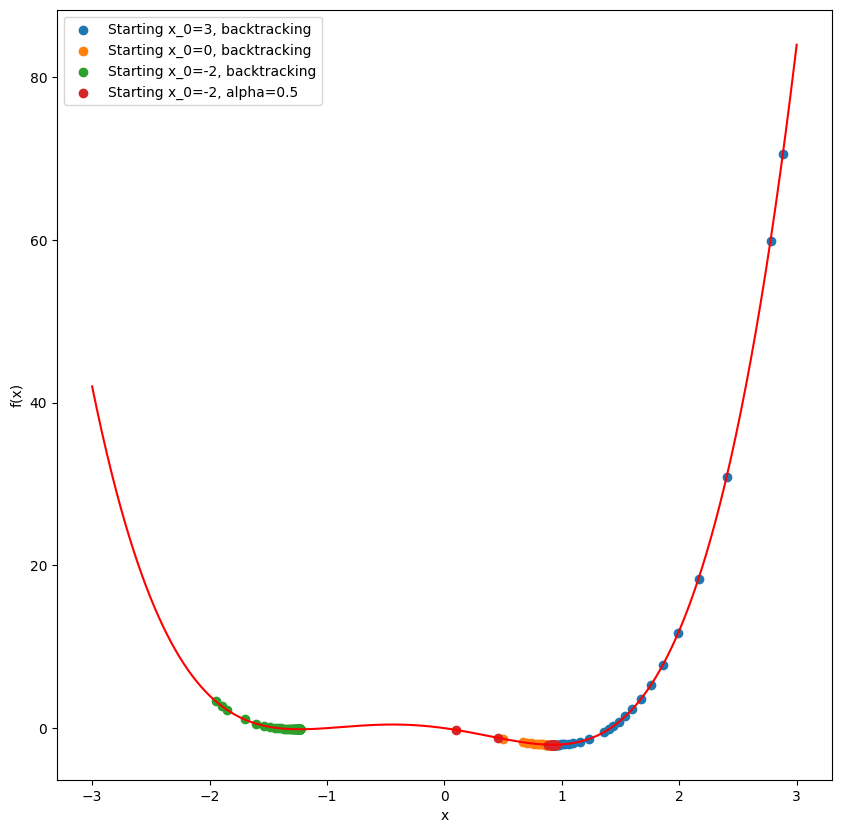

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

plot_function_2D(f, range_x=(-3, 3), ax=ax)

x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=3, k_max=1000, tol_f=1e-6, tol_x=1e-6,
                                                     backtracking_func=backtracking)
plot_gradient_descent_2D(x_ks, f_vals, ax=ax, label="Starting x_0=3, backtracking")

x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=0, k_max=1000, tol_f=1e-6, tol_x=1e-6,
                                                     backtracking_func=backtracking)
plot_gradient_descent_2D(x_ks, f_vals, ax=ax, label="Starting x_0=0, backtracking")

x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=-2, k_max=1000, tol_f=1e-6, tol_x=1e-6,
                                                     backtracking_func=backtracking)
plot_gradient_descent_2D(x_ks, f_vals, ax=ax, label="Starting x_0=-2, backtracking")

x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=-2, k_max=1000, tol_f=1e-6, tol_x=1e-6, alpha=.15)
plot_gradient_descent_2D(x_ks, f_vals, ax=ax, label="Starting x_0=-2, alpha=0.5")

ax.legend();


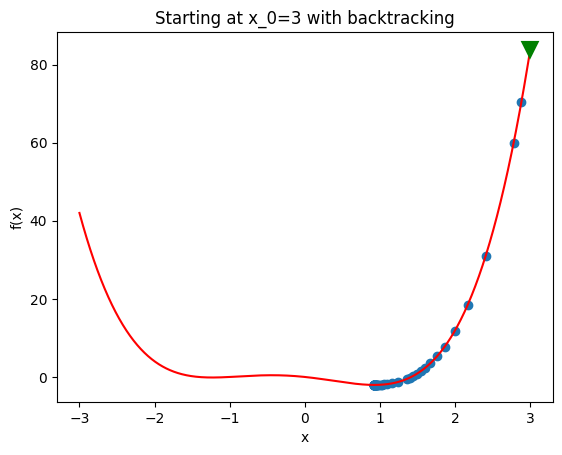

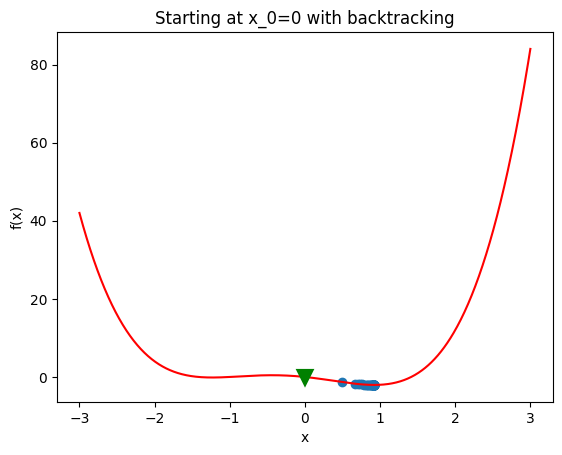

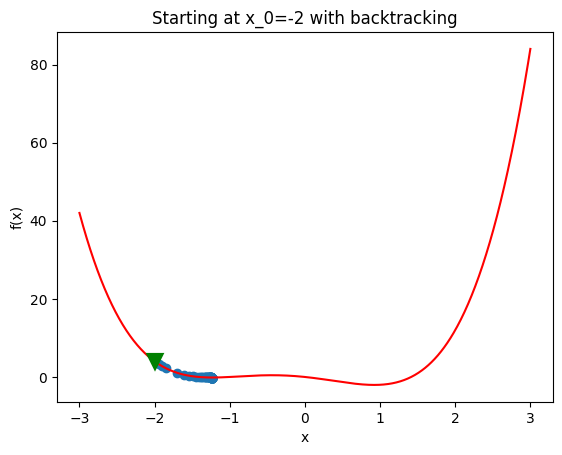

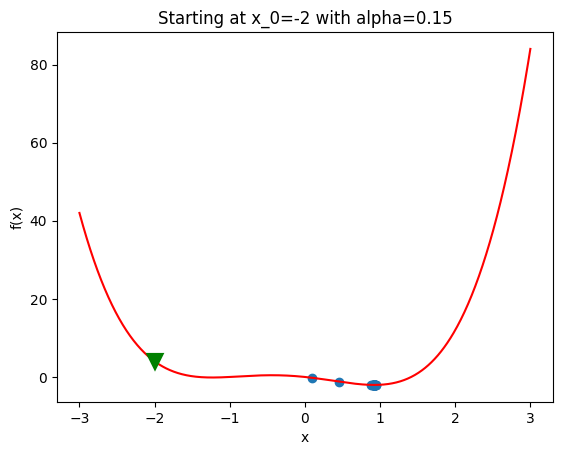

In [20]:
x_0 = 3
x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=x_0, k_max=1000, tol_f=1e-6, tol_x=1e-6,
                                                     backtracking_func=backtracking)
plot_function_2D(f, range_x=(-3, 3))
plot_gradient_descent_2D(x_ks, f_vals)
plt.plot(x_0, f(x_0), marker='v', color="green", markersize=8, markeredgewidth=3)
plt.title(f"Starting at {x_0=} with backtracking")
plt.show()

x_0 = 0
x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=x_0, k_max=1000, tol_f=1e-6, tol_x=1e-6,
                                                     backtracking_func=backtracking)
plot_function_2D(f, range_x=(-3, 3))
plot_gradient_descent_2D(x_ks, f_vals)
plt.plot(x_0, f(x_0), marker='v', color="green", markersize=8, markeredgewidth=3)
plt.title(f"Starting at {x_0=} with backtracking")
plt.show()

x_0 = -2
x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=x_0, k_max=1000, tol_f=1e-6, tol_x=1e-6,
                                                     backtracking_func=backtracking)
plot_function_2D(f, range_x=(-3, 3))
plot_gradient_descent_2D(x_ks, f_vals)
plt.plot(x_0, f(x_0), marker='v', color="green", markersize=8, markeredgewidth=3)
plt.title(f"Starting at {x_0=} with backtracking")
plt.show()

x_0 = -2
alpha = 0.15
x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=x_0, k_max=1000, tol_f=1e-6, tol_x=1e-6,
                                                     alpha=alpha)
plot_function_2D(f, range_x=(-3, 3))
plot_gradient_descent_2D(x_ks, f_vals)
plt.plot(x_0, f(x_0), marker='v', color="green", markersize=8, markeredgewidth=3)
plt.title(f"Starting at {x_0=} with {alpha=}")
plt.show()

<h1> Optimization via Stochastic Gradient Descent </h1>

In [21]:
import pandas as pd

In [22]:
def shuffle_data(X, Y, size):
    _, N = X.shape
    indexes = np.arange(N)
    np.random.shuffle(indexes)

    X_shuffle = X[:, indexes]
    Y_shuffle = Y[indexes]

    return X_shuffle, Y_shuffle

def stochastic_gradient_descent(l, grad_l, w_0, data, batch_size, n_epochs, alpha=0.1):
    w_k = w_0

    w_s = []
    f_vals = []
    grads = []
    errs = []

    X, Y = data
    d, N = X.shape

    #if N % batch_size != 0:
    #    raise Exception(f"Batch size must divide the dataset size. {N=} {batch_size=}")

    batch_count = N // batch_size

    for epoch in range(n_epochs):
        indices = np.arange(N)
        np.random.shuffle(indices)

        for i in range(batch_count):
            batch_indices = indices[i * batch_size:(i + 1) * batch_size]

            X_batch = X[:, batch_indices]
            Y_batch = Y[batch_indices]

            w_k = w_k - alpha * grad_l(w_k, X_batch, Y_batch)

        w_s.append(w_k)
        f_vals.append(l(w_k, X, Y))

        gradient = grad_l(w_k, X, Y)

        grads.append(gradient)
        errs.append(np.linalg.norm(gradient))

    return w_k, w_s, f_vals, grads, errs

In [23]:
def get_X_Y_of_digits(digits, data):
    X = data[:, 1:].T

    Y = data[:, 0]
    Y_copy = Y.copy()


    X_ks = []
    Ys = []
    for i, digit in enumerate(digits):
        X_ks.append(X[:, Y == digit])

        Y_copy[Y == digit] = i
        Ys.append(Y_copy[Y == digit])

    X = np.concatenate(X_ks, axis=1)
    Y = np.concatenate(Ys)

    return X, Y


def split_dataset(X, Y, N_train=1000):
    d, N = X.shape

    print(f"{d=}, {N=}")

    indices = np.arange(N)
    np.random.shuffle(indices)

    train_indices = indices[:N_train]
    test_indices = indices[N_train:]

    X_train = X[:, train_indices]
    Y_train = Y[train_indices]

    X_test = X[:, test_indices]
    Y_test = Y[test_indices]

    return X_train, Y_train, X_test, Y_test

In [24]:
data = pd.read_csv("./data.csv")
data = np.array(data)

In [43]:
#first_digit = int(input("Select a first digit"))
#second_digit = int(input("Select a second digit"))
#print(f"Selected {first_digit=} and {second_digit=}")

digits = [3, 6]  #[first_digit, second_digit]

X, Y = get_X_Y_of_digits(digits, data)

d, N = X.shape
D = X, Y

X = np.concatenate((np.ones((1, N )), X))

X_train, Y_train, X_test, Y_test = split_dataset(X, Y, N_train=4600)

D_train = X_train, Y_train
D_test = X_test, Y_test

print(f"{X_train.shape=}")
print(f"{X_test.shape=}")
print(f"{Y_train.shape=}")
print(f"{Y_test.shape=}")

d=785, N=8488
X_train.shape=(785, 4600)
X_test.shape=(785, 3888)
Y_train.shape=(4600,)
Y_test.shape=(3888,)


In [41]:
def sigmoid_with_overflow(x):
    return 1.0 / (1 + np.exp(-x))

def sigmoid( signal ):
    # Prevent overflow.
    signal = np.clip( signal, -500, 500 )

    # Calculate activation signal
    signal = 1.0/( 1 + np.exp( -signal ))

    return signal


def f_w(x, w):
    return sigmoid(x.T @ w)


def MSE(y, y_true):
    return np.linalg.norm((y_true - y)) ** 2


def loss(w, x, y):
    y = np.reshape(y, (len(y), 1))
    return np.sum(MSE(f_w(x, w), y)) / N

def loss_grad(w, x, y):
    d, n = x.shape

    y = np.array(y)

    sum = 0
    for i in range(n):
        z = f_w(x[:,i], w)
        sum += z * (1 - z) * x[:,i].T * (z - y[i])

    return sum / n




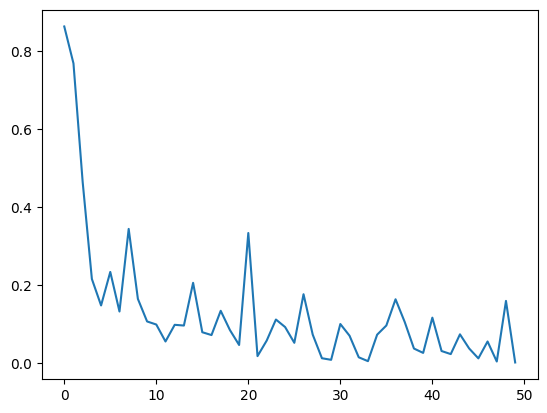

In [56]:
d, N = X_train.shape

w_0 = np.random.normal(0, 1e-1, d)
n_epoch = 50

w_k, w_s, f_vals, grads, errs = stochastic_gradient_descent(loss, loss_grad, w_0, D_train, batch_size=15, n_epochs=n_epoch,alpha=1e-3)


plt.plot(range(0, n_epoch),errs);


In [55]:
def predict(w, X, threshold=0.5):
    y = f_w(X, w)
    y_copy = y.copy()
    y[y_copy < threshold] = 0
    y[y_copy >= threshold] = 1
    return y


def accuracy(y_true, y_pred):
    return round(np.mean(y_true == y_pred), 2)


y_pred = predict(w_k, X_test, 0.5)
print(f"Accuracy : {accuracy(Y_test, y_pred)}")

Accuracy : 1.0


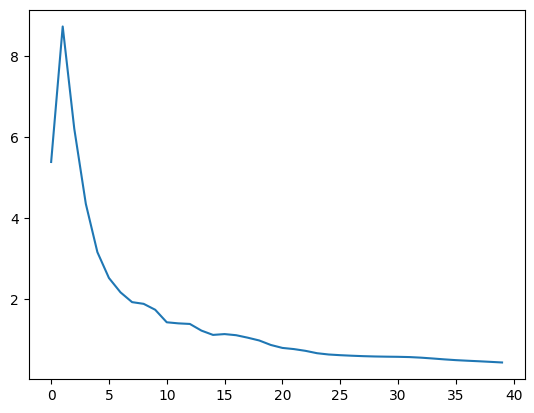

In [29]:
def _loss_grad_train(w):
    return loss_grad(w, X_train, Y_train)

def _loss_train(w):
    return loss(w, X_train, Y_train)


x_k, k, f_vals, grads, errs, x_ks = gradient_descent(_loss_train, _loss_grad_train, x_0=np.random.normal(0, 1e-2, d), k_max=40, tol_f=1e-6, tol_x=1e-6, alpha=1e-3)#backtracking_func=backtracking)

plt.plot(errs);

In [30]:
y_pred = predict(x_k, X_test, 0.5)
print(f"Accuracy : {accuracy(Y_test, y_pred)}")

Accuracy : 0.96
